<a href="https://colab.research.google.com/github/marcinmichalsmolen/wum2022/blob/main/WUM5_Obraz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praca domowa - obraz


Najpierw upewnijmy się, że pracujemy na GPU. 

* Włącz GPU (Runtime / Change runtime type)

## MNIST



### Wczytanie i wizualizacja

* Wczytaj dane mnist do zmiennych X_train, y_train, X_test, y_test.
https://keras.io/datasets/

In [1]:
from keras.datasets import mnist as dataset
import numpy as np
(X_train, y_train), (X_test, y_test) = dataset.load_data()

11490434/11490434 [==============================] - 2s 0us/step


Teraz sprawdź i napisz:
* ile mamy instancji treningowych:
* ile mamy instancji testowych:
* jakie są wymiary w pixelach jednego obrazka:
* ile kanałów ma jeden obrazek:
* ile bajtów zajmuje jeden piksel:
* jaka jest minimalna i maksymalna wartość piksela:



In [2]:
print("X_train: {}, y_train: {}", X_train.shape, y_train.shape)
print("X_test: {}, y_test: {}", X_test.shape, y_test.shape)

X_train: {}, y_train: {} (60000, 28, 28) (60000,)
X_test: {}, y_test: {} (10000, 28, 28) (10000,)



*   Instancji treningowych mamy 60000, 
*   testowych 10000, 
*   wymiary w pixelach: 28 x 28, 
*   jeden obrazek ma jeden kanał (odcienie szarości), 
*   1 piksel zajmuje 1 bajt czyli 2^8 ,
*   Minimalna wartość 0, maksymalna 255


Świetnie, teraz: 
* Wyrysuj pierwsze 12 elementów zbioru treningowego.
* Wypisz lub narysuj etykiety tych 12 elementów. 

[Tutaj są różne color mapy.](  
https://matplotlib.org/examples/color/colormaps_reference.html), których możesz użyć w funkcji imshow.  

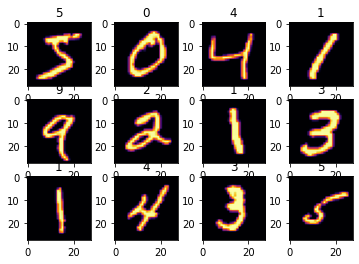

In [3]:
# Rysowanie 12 elementów - etykiety na górze
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='gray')
for i in range(12):
  plt.subplot(3, 4, i+1)
  plt.imshow(X_train[i], cmap='inferno')
  plt.title(y_train[i])
plt.show()

In [4]:
# Wypisanie samych 12 etykiet
for i in range(12):
 print(y_train[i])


5
0
4
1
9
2
1
3
1
4
3
5


* Teraz narysuj swój numer studenta używając cyfr zbioru mnist. Jeśli Twój indeks to np. s12345, wyrysuj 5 obrazków z cyframi '1', '2', '3', '4' i '5' obok siebie. 

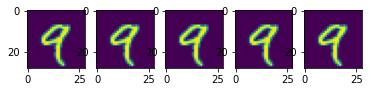

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='gray')
for i in range(5):
  plt.subplot(3, 5, i+1)
  plt.imshow(X_train[5]),
  plt.imshow(X_train[7]),
  plt.imshow(X_train[2]),
  plt.imshow(X_train[5]),
  plt.imshow(X_train[4]),
plt.show()



### Klasyfikacja CNN'em

####Przygotowanie danych

Przygotujmy nasze dane treningowe:
* Przerób X_train i X_test tak, żeby wartości wszystkich pixeli były zawarte w przedziale <0,1>
* Zmień typ naszych pixeli na 'float32'

*Może się przydać metoda astype.*

In [6]:
X_train = X_train / 255
X_test = X_test / 255
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

Przygotowaliśmy dane treningowe, teraz jeszcze etykiety.  W tej chwili jest to wektor liczb - dla każdej instancji mamy jedną liczbę. Nasza sieć będzie miała na wyjściu 10 wartości (wynik dla każdej klasy), więc musimy przerobić nasze liczby do postaci one-hot. Jeśli klasy trzech instancji to np. [0, 3, 5], w postaci one-hot będziemy mieć na przykład coś takiego:  
[1000000000]  
[0001000000]  
[0000010000]

Możesz do tego użyć funkcji [to_categorical](https://keras.io/api/utils/python_utils/).

* Przekonwertuj etykiety do postaci one-hot i wpisz wyniki do zmiennych Y_train i Y_test. 
* Wypisz 10 pierwszych elementów Y_train oraz y_train. 
* Napisz, jak w nowej postaci będą zapisane etykiety cyfr: 1, 2 i 4. 
* Wypisz kolejne cyfry swojego numeru indeksu używając powyższego zapisu. 

In [7]:
from keras.utils.np_utils import to_categorical as tk
Y_train = tk(y_train)
Y_test =tk(y_test)

In [8]:
print('10 pierwszych elementów Y_train oraz y_train:')
for i in range(10):
 print([i], Y_train[i], y_train[i])

10 pierwszych elementów Y_train oraz y_train:
[0] [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] 5
[1] [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0
[2] [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] 4
[3] [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] 1
[4] [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] 9
[5] [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] 2
[6] [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] 1
[7] [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] 3
[8] [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] 1
[9] [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] 4


Nowa postać etykiet cyfr 1, 2 i 4:
*   1 to [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.],
*   2 to [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.],
*   4 to [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [9]:
print('NUMER INDEKSU s23429:')
print(Y_train[5], y_train[5])
print(Y_train[7], y_train[7])
print(Y_train[2], y_train[2])
print(Y_train[5], y_train[5])
print(Y_train[4], y_train[4])

NUMER INDEKSU s23429:
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] 2
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] 3
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] 4
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] 2
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] 9


Pierwsze warstwy naszej sieci będą typu Conv2D. Przyjmują one dane instancji w postaci wielowymiarowych tablic. Nie spłaszczamy zatem danych do postaci wektora - jak musielibyśmy zrobić w przypatku SVM lub MLP. Zrobi to dopiero potem warstwa Flatten naszej sieci.  

Przekazujemy sieci instancje w postaci szerokość x wysokość x liczba_kanałów (format 'channels_last', w przypdku formatu 'channels_first' tablica miałaby wymiary liczba_kanałów x szerokość x wysokość).

* upewnij się, że działamy w trybie channels_last (keras.backend.image_data_format())
* sprawdź jeszcze raz shape danych treningowych i testowych
* jeśli brakuje nam ostatniego wymiaru, dodajmy go

*np.expand_dims(X_train, -1) powinien nam dodać brakujący wymiar na końcu; opcjonalnie można użyć kodu z ćwiczeń*

 

In [10]:
from keras import backend as K
print(K.image_data_format())
print("X_train: {}, y_train: {}", X_train.shape, y_train.shape)
print("X_test: {}, y_test: {}", X_test.shape, y_test.shape)

channels_last
X_train: {}, y_train: {} (60000, 28, 28) (60000,)
X_test: {}, y_test: {} (10000, 28, 28) (10000,)


#### Przygotowanie sieci

Prawdopodobnie przydadzą nam się poniższe importy. 
```python
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
```

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import tensorflow as tf
insh = (28, 28, 1)

* Zbuduj sieć z takimi warstwami:
 * Na wejściu [Conv2D](https://keras.io/api/layers/convolution_layers/convolution2d/): 16 filtrów, kernel 3x3, padding 'same', activation [relu](https://cs-cheatsheet.readthedocs.io/en/latest/_images/activation_functions.png)
 * [MaxPooling2D](https://keras.io/api/layers/pooling_layers/max_pooling2d/): pool_size 2x2
 * Conv2D: 32 filtry, kernel 3x3, padding 'same', activation relu
 * MaxPooling2D: pool_size 2x2
 * [Flatten](https://keras.io/api/layers/reshaping_layers/flatten/) (spłaszczamy dane do 1-wymiarowego wektora)
 * Na wyjściu [Dense](https://keras.io/api/layers/core_layers/dense/), units tyle, co klas, [aktywacja softmax](https://qph.fs.quoracdn.net/main-qimg-fda2f008df90ed5d7b6aff89b881e1ac)

Pierwsza warstwa będzie oczekiwać podania kształtu danych (input_shape). Czyli szerokość x wysokość x liczba kanałów. 

In [12]:
model = Sequential([
  Conv2D(16, kernel_size=(3,3), padding='same',activation='relu', input_shape = insh),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(32, kernel_size=(3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  Flatten(),
  Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

* Sprawdź, jak wygląda Twoja sieć  
Przyda się metoda model.summary i ewentualnie funkcja keras.utils.vis_utils.plot_model

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 10)                1

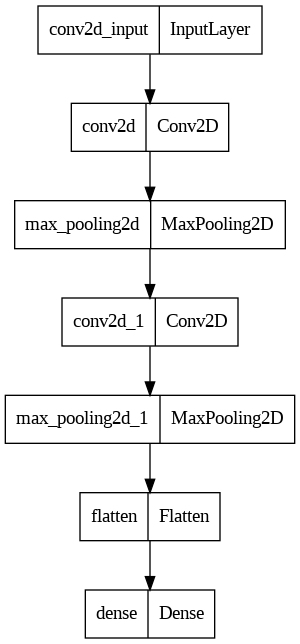

In [14]:
import tensorflow as tf
tf.keras.utils.plot_model(
  model,
  to_file='model.png',
  show_shapes=False,
  show_dtype=False,
  show_layer_names=True,
  rankdir='TB',
  expand_nested=False,
  dpi=96,
  layer_range=None,
  show_layer_activations=False
)


* Spróbuj usunąć argument padding i napisz, co się zmieniło. 
* Przywróć padding. 

In [15]:
model = Sequential([
  Conv2D(16, kernel_size=(3,3), activation='relu', input_shape=insh),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(32, kernel_size=(3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  Flatten(),
  Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_1 (Dense)             (None, 10)               

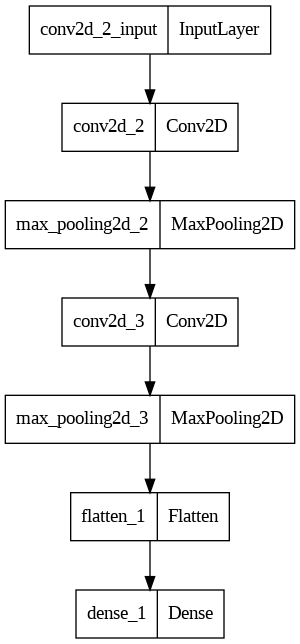

In [17]:
import tensorflow as tf
tf.keras.utils.plot_model(
  model,
  to_file='model.png',
  show_shapes=False,
  show_dtype=False,
  show_layer_names=True,
  rankdir='TB',
  expand_nested=False,
  dpi=96,
  layer_range=None,
  show_layer_activations=False
)


Po usunięciu argumentu padding mamy mnie parametrów sieci. W kolejnych warstwach mamy inny Output shape (mniejszy) - np w drugiej warstwie zamiast (None, 14, 14, 16) mamy (None, 13, 13, 16) i to wpływa na kształt kolejnych warstw i tak na prawie samym końcu po spłaszczeniu do 1-wymiarowego wektora mamy bez argumentu padding  (None, 800) zamiast  (None, 1152)

In [18]:
model = Sequential([
  Conv2D(16, kernel_size=(3,3), padding='same',activation='relu', input_shape = insh),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(32, kernel_size=(3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  Flatten(),
  Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Odpowiedz na poniższe pytania: 
* Czy warstwa Conv2D się uczy w trakcie treningu?: 
* Czy warstwa MaxPooling2D się uczy w trakcie treningu?:
* Dlaczego przed warstwą / warstwami Dense umieszczamy warstwę Flatten?:
* Ile będziemy mieć kanałów / map aktywacji po przepuszczeniu obrazka przez pierwszą warstwę Conv2D naszej sieci?:




* Warstwa Conv2D jako warstwa wejściowa nie uczy się tylko przekazuje dalej dane wejściowe
*  Warstwa MaxPooling2D to algorytm, który w każdej epoce działą tak samo (też się nie uczy) List item
*  Dense implementuje operację: wyjście = aktywacja - spłaszczenie pozwala połączyć całą wartwę z warstwą Dense będącą wyjściem sieci
*  Po przepuszczeniu przez pierwszą warstwę Conv2D będziemy mieli 16 kanałów/map aktywacji

Teraz:
* Uruchom metodę compile: loss 'categorical_crossentropy', optimizer 'adam'. Argument metrics przyjmuje tablicę stringów, możemy tam np. śledzić 'accuracy'. 

In [19]:
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [20]:
from matplotlib import pyplot
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [21]:
def summarize_diagnostics(history):
  pyplot.title('Dokładność klasyfikacji')
  pyplot.plot(history.history['accuracy'], color='orange', label='train')
  pyplot.subplots_adjust (right=2)
  pyplot.show()

#### Trening
* Wytrenuj sieć. 100 epok, batch_size 256.

Epoch 1/100
235/235 [==============================] - 10s 5ms/step - loss: 0.4957 - accuracy: 0.8660
Epoch 2/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1138 - accuracy: 0.9667
Epoch 3/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0779 - accuracy: 0.9774
Epoch 4/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0647 - accuracy: 0.9814
Epoch 5/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0549 - accuracy: 0.9836
Epoch 6/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0485 - accuracy: 0.9851
Epoch 7/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0451 - accuracy: 0.9865
Epoch 8/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0427 - accuracy: 0.9869
Epoch 9/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0384 - accuracy: 0.9882
Epoch 10/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0356 - accur

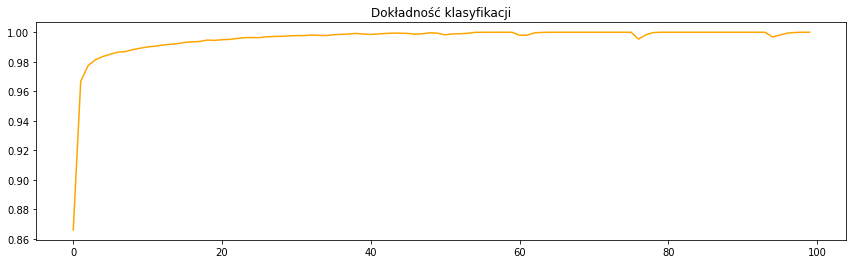

In [22]:
history = model.fit(
    x=X_train,
    y=Y_train,
    batch_size=256,
    epochs=100,
    verbose="auto",
    callbacks=None,
    validation_split=0.0,
    )
summarize_diagnostics(history)



#### Ewaluacja
* Zrób ewaluację naszego modelu na zbiorze treningowym i testowym (metoda evaluate). 
* Podaj wyniki dla obu zbiorów: 
* Czy wyniki się różnią? Dlaczego? 

In [23]:
train_accuracy = model.evaluate(X_train, Y_train)
test_accuracy = model.evaluate(X_test, Y_test)
print('Dokładności klasyfikacji na materiale treningowym  = ',train_accuracy)
print('dokładności klasyfikacji na materiale testowym  = ',test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0677 - accuracy: 0.9893
Dokładności klasyfikacji na materiale treningowym  =  [0.00010547178681008518, 1.0]
dokładności klasyfikacji na materiale testowym  =  [0.06772349029779434, 0.989300012588501]


Wyniki nieznacznie się różnią, gdyż model radzi sobie lepiej na zbiorze treningowym (na którym się uczył) niż na testowym

## FASHION MNIST 
Teraz powtórzymy eksperyment na innym, ale bardzo podobnym zbiorze danych. 

### Wczytanie i przygotowanie danych
* Wczytaj zbiór fashion_mnist analogicznie do mnist'a
* Przygotuj dane treningowe/testowe oraz etykiety analogicznie do mnista'a

In [24]:
from keras.datasets import fashion_mnist as dataset
import numpy as np
(X_train, y_train), (X_test, y_test) = dataset.load_data()
print("X_train: {}, y_train: {}", X_train.shape, y_train.shape)
print("X_test: {}, y_test: {}", X_test.shape, y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
X_train: {}, y_train: {} (60000, 28, 28) (60000,)
X_test: {}, y_test: {} (10000, 28, 28) (10000,)


* Wyświetl 12 pierwszych instancji treningowych

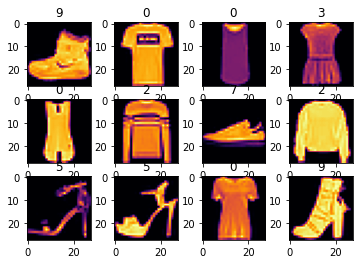

In [25]:
# Rysowanie 12 elementów - etykiety na górze
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='gray')
for i in range(12):
  plt.subplot(3, 4, i+1)
  plt.imshow(X_train[i], cmap='inferno')
  plt.title(y_train[i])
plt.show()

* Przygotuj dane i etykiety do treningu (tak samo jak w mnist)

In [26]:
X_train = X_train / 255
X_test = X_test / 255
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
from keras.utils.np_utils import to_categorical as tk
Y_train = tk(y_train)
Y_test =tk(y_test)

### Przygotowanie sieci i trening

* Stwórz identyczną sieć jak przy mnist i przeprowadź trening. 

In [27]:
model = Sequential([
  Conv2D(16, kernel_size=(3,3), padding='same',activation='relu', input_shape = insh),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(32, kernel_size=(3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  Flatten(),
  Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Epoch 1/100
235/235 [==============================] - 2s 5ms/step - loss: 0.7677 - accuracy: 0.7359
Epoch 2/100
235/235 [==============================] - 1s 5ms/step - loss: 0.4476 - accuracy: 0.8394
Epoch 3/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3956 - accuracy: 0.8594
Epoch 4/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3669 - accuracy: 0.8701
Epoch 5/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3518 - accuracy: 0.8747
Epoch 6/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3285 - accuracy: 0.8828
Epoch 7/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3169 - accuracy: 0.8863
Epoch 8/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3054 - accuracy: 0.8916
Epoch 9/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2940 - accuracy: 0.8954
Epoch 10/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2835 - accura

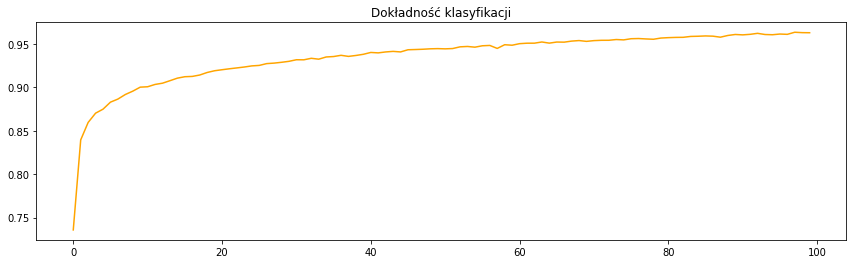

In [28]:
history2 = model.fit(
    x=X_train,
    y=Y_train,
    batch_size=256,
    epochs=100,
    verbose="auto",
    callbacks=None,
    validation_split=0.0,
    )
summarize_diagnostics(history2)

### Ewaluacja
* Zrób ewaluację naszego modelu na zbiorze treningowym i testowym (metoda evaluate).
* Podaj wyniki dla obu zbiorów:

In [29]:
train_accuracy = model.evaluate(X_train, Y_train)
test_accuracy = model.evaluate(X_test, Y_test)
print('Dokładności klasyfikacji na materiale treningowym  = ',train_accuracy)
print('dokładności klasyfikacji na materiale testowym  = ',test_accuracy)


313/313 [==============================] - 1s 3ms/step - loss: 0.3245 - accuracy: 0.9060
Dokładności klasyfikacji na materiale treningowym  =  [0.097755566239357, 0.9652166962623596]
dokładności klasyfikacji na materiale testowym  =  [0.32450321316719055, 0.906000018119812]


### Early stopping
* Dodajmy do treningu zbiór walidacyjny - możesz do tego użyć argumentu 'validation_split' metody [fit](https://keras.io/api/models/model_training_apis/). Zróbmy 10%. 
* Dodaj [early stopping](https://keras.io/api/callbacks/early_stopping/), patience 5. 
* Przeprowadź dwa treningi - najpierw monitorując w early stopping 'loss' a potem 'val_loss'. Jaka jest różnica? 

Jeśli early stopping nie miał okazji zadziałać, zwiększ liczbę epok. 

In [30]:
from tensorflow import keras
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from matplotlib import pyplot

In [31]:
f1 = tf.keras.callbacks.EarlyStopping(monitor='loss', verbose=0, patience=5, mode="auto")
f2 = tf.keras.callbacks.ModelCheckpoint(filepath='modelx', save_weights_only = False, monitor = 'accuracy', mode='max', save_best_only = True)
f3 = tf.keras.callbacks.TensorBoard(log_dir='./logs')

Epoch 1/100
211/211 [==============================] - ETA: 0s - loss: 0.1046 - accuracy: 0.9629

211/211 [==============================] - 2s 11ms/step - loss: 0.1046 - accuracy: 0.9629 - val_loss: 0.1011 - val_accuracy: 0.9625
Epoch 2/100
211/211 [==============================] - 1s 5ms/step - loss: 0.1023 - accuracy: 0.9622 - val_loss: 0.1076 - val_accuracy: 0.9598
Epoch 3/100
208/211 [============================>.] - ETA: 0s - loss: 0.0998 - accuracy: 0.9640

211/211 [==============================] - 2s 8ms/step - loss: 0.0998 - accuracy: 0.9639 - val_loss: 0.1080 - val_accuracy: 0.9595
Epoch 4/100
211/211 [==============================] - 1s 5ms/step - loss: 0.1005 - accuracy: 0.9633 - val_loss: 0.1048 - val_accuracy: 0.9637
Epoch 5/100
205/211 [============================>.] - ETA: 0s - loss: 0.0983 - accuracy: 0.9647

211/211 [==============================] - 2s 8ms/step - loss: 0.0980 - accuracy: 0.9648 - val_loss: 0.1149 - val_accuracy: 0.9585
Epoch 6/100
211/211 [==============================] - 1s 6ms/step - loss: 0.0975 - accuracy: 0.9643 - val_loss: 0.1101 - val_accuracy: 0.9600
Epoch 7/100
211/211 [==============================] - 1s 5ms/step - loss: 0.1005 - accuracy: 0.9631 - val_loss: 0.1222 - val_accuracy: 0.9550
Epoch 8/100
211/211 [==============================] - 1s 5ms/step - loss: 0.0986 - accuracy: 0.9637 - val_loss: 0.1248 - val_accuracy: 0.9515
Epoch 9/100
206/211 [============================>.] - ETA: 0s - loss: 0.0971 - accuracy: 0.9658

211/211 [==============================] - 2s 8ms/step - loss: 0.0973 - accuracy: 0.9656 - val_loss: 0.1247 - val_accuracy: 0.9527
Epoch 10/100
211/211 [==============================] - 1s 5ms/step - loss: 0.0953 - accuracy: 0.9649 - val_loss: 0.1248 - val_accuracy: 0.9532
Epoch 11/100
211/211 [==============================] - 1s 5ms/step - loss: 0.0946 - accuracy: 0.9650 - val_loss: 0.1249 - val_accuracy: 0.9545
Epoch 12/100
207/211 [============================>.] - ETA: 0s - loss: 0.0940 - accuracy: 0.9660

211/211 [==============================] - 2s 8ms/step - loss: 0.0938 - accuracy: 0.9661 - val_loss: 0.1334 - val_accuracy: 0.9510
Epoch 13/100
211/211 [==============================] - 1s 5ms/step - loss: 0.0946 - accuracy: 0.9660 - val_loss: 0.1309 - val_accuracy: 0.9525
Epoch 14/100
206/211 [============================>.] - ETA: 0s - loss: 0.0916 - accuracy: 0.9667

211/211 [==============================] - 2s 8ms/step - loss: 0.0916 - accuracy: 0.9666 - val_loss: 0.1312 - val_accuracy: 0.9495
Epoch 15/100
203/211 [===========================>..] - ETA: 0s - loss: 0.0912 - accuracy: 0.9667

211/211 [==============================] - 2s 8ms/step - loss: 0.0908 - accuracy: 0.9669 - val_loss: 0.1385 - val_accuracy: 0.9473
Epoch 16/100
211/211 [==============================] - 1s 5ms/step - loss: 0.0926 - accuracy: 0.9667 - val_loss: 0.1362 - val_accuracy: 0.9482
Epoch 17/100
202/211 [===========================>..] - ETA: 0s - loss: 0.0904 - accuracy: 0.9676

211/211 [==============================] - 2s 9ms/step - loss: 0.0900 - accuracy: 0.9677 - val_loss: 0.1428 - val_accuracy: 0.9470
Epoch 18/100
211/211 [==============================] - 1s 6ms/step - loss: 0.0898 - accuracy: 0.9676 - val_loss: 0.1416 - val_accuracy: 0.9468
Epoch 19/100
211/211 [==============================] - 1s 5ms/step - loss: 0.0906 - accuracy: 0.9674 - val_loss: 0.1451 - val_accuracy: 0.9447
Epoch 20/100
211/211 [==============================] - 1s 5ms/step - loss: 0.0908 - accuracy: 0.9677 - val_loss: 0.1567 - val_accuracy: 0.9455
Epoch 21/100
204/211 [============================>.] - ETA: 0s - loss: 0.0887 - accuracy: 0.9685

211/211 [==============================] - 2s 8ms/step - loss: 0.0885 - accuracy: 0.9685 - val_loss: 0.1517 - val_accuracy: 0.9435
Epoch 22/100
211/211 [==============================] - 1s 5ms/step - loss: 0.0897 - accuracy: 0.9679 - val_loss: 0.1480 - val_accuracy: 0.9443
Epoch 23/100
205/211 [============================>.] - ETA: 0s - loss: 0.0865 - accuracy: 0.9690

211/211 [==============================] - 2s 8ms/step - loss: 0.0869 - accuracy: 0.9690 - val_loss: 0.1625 - val_accuracy: 0.9395
Epoch 24/100
204/211 [============================>.] - ETA: 0s - loss: 0.0843 - accuracy: 0.9703

211/211 [==============================] - 2s 8ms/step - loss: 0.0849 - accuracy: 0.9700 - val_loss: 0.1502 - val_accuracy: 0.9445
Epoch 25/100
211/211 [==============================] - 1s 6ms/step - loss: 0.0824 - accuracy: 0.9698 - val_loss: 0.1529 - val_accuracy: 0.9453
Epoch 26/100
211/211 [==============================] - 1s 6ms/step - loss: 0.0866 - accuracy: 0.9684 - val_loss: 0.1576 - val_accuracy: 0.9427
Epoch 27/100
211/211 [==============================] - 1s 6ms/step - loss: 0.0872 - accuracy: 0.9684 - val_loss: 0.1518 - val_accuracy: 0.9448
Epoch 28/100
211/211 [==============================] - 1s 6ms/step - loss: 0.0839 - accuracy: 0.9693 - val_loss: 0.1591 - val_accuracy: 0.9420
Epoch 29/100
211/211 [==============================] - 1s 6ms/step - loss: 0.0848 - accuracy: 0.9695 - val_loss: 0.1615 - val_accuracy: 0.9422
Epoch 30/100
205/211 [============================>.] - ETA: 0s - loss: 0.0825 - accuracy: 0.9701

211/211 [==============================] - 2s 8ms/step - loss: 0.0822 - accuracy: 0.9703 - val_loss: 0.1553 - val_accuracy: 0.9435
Epoch 31/100
206/211 [============================>.] - ETA: 0s - loss: 0.0813 - accuracy: 0.9708

211/211 [==============================] - 2s 8ms/step - loss: 0.0814 - accuracy: 0.9708 - val_loss: 0.1678 - val_accuracy: 0.9377
Epoch 32/100
211/211 [==============================] - 1s 6ms/step - loss: 0.0816 - accuracy: 0.9702 - val_loss: 0.1666 - val_accuracy: 0.9403
Epoch 33/100
209/211 [============================>.] - ETA: 0s - loss: 0.0800 - accuracy: 0.9724

211/211 [==============================] - 2s 8ms/step - loss: 0.0806 - accuracy: 0.9722 - val_loss: 0.1690 - val_accuracy: 0.9385
Epoch 34/100
211/211 [==============================] - 1s 5ms/step - loss: 0.0817 - accuracy: 0.9706 - val_loss: 0.1818 - val_accuracy: 0.9350
Epoch 35/100
211/211 [==============================] - 1s 5ms/step - loss: 0.0826 - accuracy: 0.9700 - val_loss: 0.1779 - val_accuracy: 0.9393
Epoch 36/100
211/211 [==============================] - 1s 5ms/step - loss: 0.0822 - accuracy: 0.9701 - val_loss: 0.1734 - val_accuracy: 0.9408
Epoch 37/100
211/211 [==============================] - 1s 6ms/step - loss: 0.0787 - accuracy: 0.9715 - val_loss: 0.1816 - val_accuracy: 0.9357
Epoch 38/100
211/211 [==============================] - 1s 5ms/step - loss: 0.0787 - accuracy: 0.9715 - val_loss: 0.1762 - val_accuracy: 0.9375
Epoch 39/100
211/211 [==============================] - 1s 5ms/step - loss: 0.0810 - accuracy: 0.9708 - val_loss: 0.1740 - val_accuracy: 0.9372
Epoch

211/211 [==============================] - 2s 9ms/step - loss: 0.0784 - accuracy: 0.9728 - val_loss: 0.1755 - val_accuracy: 0.9372
Epoch 42/100
211/211 [==============================] - 1s 5ms/step - loss: 0.0790 - accuracy: 0.9709 - val_loss: 0.1869 - val_accuracy: 0.9357
Epoch 43/100
211/211 [==============================] - 1s 5ms/step - loss: 0.0778 - accuracy: 0.9719 - val_loss: 0.2001 - val_accuracy: 0.9318
Epoch 44/100
211/211 [==============================] - 1s 5ms/step - loss: 0.0763 - accuracy: 0.9725 - val_loss: 0.1850 - val_accuracy: 0.9358
Epoch 45/100
206/211 [============================>.] - ETA: 0s - loss: 0.0739 - accuracy: 0.9733

211/211 [==============================] - 2s 8ms/step - loss: 0.0740 - accuracy: 0.9731 - val_loss: 0.1919 - val_accuracy: 0.9362
Epoch 46/100
211/211 [==============================] - 1s 5ms/step - loss: 0.0752 - accuracy: 0.9727 - val_loss: 0.1893 - val_accuracy: 0.9363
Epoch 47/100
207/211 [============================>.] - ETA: 0s - loss: 0.0749 - accuracy: 0.9739

211/211 [==============================] - 2s 8ms/step - loss: 0.0748 - accuracy: 0.9740 - val_loss: 0.1928 - val_accuracy: 0.9372
Epoch 48/100
211/211 [==============================] - 1s 5ms/step - loss: 0.0764 - accuracy: 0.9721 - val_loss: 0.1900 - val_accuracy: 0.9365
Epoch 49/100
211/211 [==============================] - 1s 6ms/step - loss: 0.0756 - accuracy: 0.9728 - val_loss: 0.2045 - val_accuracy: 0.9345
Epoch 50/100
206/211 [============================>.] - ETA: 0s - loss: 0.0724 - accuracy: 0.9747

211/211 [==============================] - 2s 8ms/step - loss: 0.0722 - accuracy: 0.9748 - val_loss: 0.2029 - val_accuracy: 0.9348
Epoch 51/100
211/211 [==============================] - 1s 5ms/step - loss: 0.0732 - accuracy: 0.9739 - val_loss: 0.2114 - val_accuracy: 0.9338
Epoch 52/100
211/211 [==============================] - 1s 5ms/step - loss: 0.0729 - accuracy: 0.9741 - val_loss: 0.2080 - val_accuracy: 0.9340
Epoch 53/100
211/211 [==============================] - 1s 5ms/step - loss: 0.0712 - accuracy: 0.9747 - val_loss: 0.2221 - val_accuracy: 0.9267
Epoch 54/100
211/211 [==============================] - 1s 6ms/step - loss: 0.0723 - accuracy: 0.9736 - val_loss: 0.2211 - val_accuracy: 0.9288
Epoch 55/100
211/211 [==============================] - 1s 5ms/step - loss: 0.0731 - accuracy: 0.9736 - val_loss: 0.2253 - val_accuracy: 0.9280
Epoch 56/100
207/211 [============================>.] - ETA: 0s - loss: 0.0686 - accuracy: 0.9762

211/211 [==============================] - 2s 8ms/step - loss: 0.0690 - accuracy: 0.9761 - val_loss: 0.2079 - val_accuracy: 0.9333
Epoch 57/100
211/211 [==============================] - 1s 6ms/step - loss: 0.0714 - accuracy: 0.9744 - val_loss: 0.2226 - val_accuracy: 0.9310
Epoch 58/100
211/211 [==============================] - 1s 6ms/step - loss: 0.0714 - accuracy: 0.9742 - val_loss: 0.2182 - val_accuracy: 0.9310
Epoch 59/100
211/211 [==============================] - 1s 5ms/step - loss: 0.0708 - accuracy: 0.9743 - val_loss: 0.2160 - val_accuracy: 0.9285
Epoch 60/100
211/211 [==============================] - 1s 5ms/step - loss: 0.0712 - accuracy: 0.9742 - val_loss: 0.2342 - val_accuracy: 0.9308
Epoch 61/100
313/313 [==============================] - 1s 3ms/step - loss: 0.4151 - accuracy: 0.9029
[0.07691214978694916, 0.9747999906539917, 0.4151492118835449, 0.902899980545044]
Dokładności klasyfikacji na materiale treningowym  =  [0.07691214978694916, 0.9747999906539917]
dokładności kl

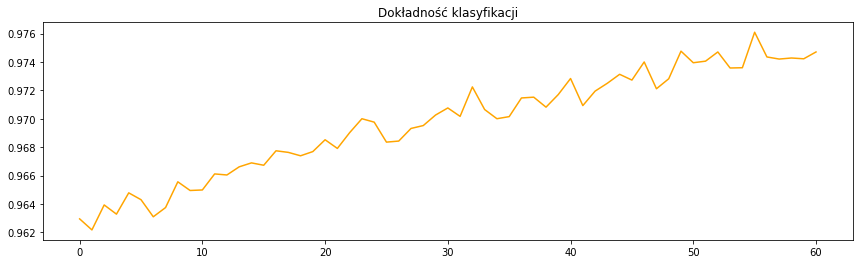

In [32]:
history3 = model.fit(
    x=X_train,
    y=Y_train,
    batch_size=256,
    epochs=100,
    verbose="auto",
    callbacks= [f1,f2,f3],
    validation_split=0.1,
    )
trained_model = keras.models.load_model('modelx')
train_accuracy = trained_model.evaluate(X_train, Y_train)
test_accuracy = trained_model.evaluate(X_test, Y_test)
print(train_accuracy + test_accuracy)
print('Dokładności klasyfikacji na materiale treningowym  = ',train_accuracy)
print('dokładności klasyfikacji na materiale testowym  = ',test_accuracy)
summarize_diagnostics(history3)

**Drugi trening z monitor='val_loss'**




Epoch 1/100
202/211 [===========================>..] - ETA: 0s - loss: 0.0692 - accuracy: 0.9747

211/211 [==============================] - 2s 8ms/step - loss: 0.0692 - accuracy: 0.9747 - val_loss: 0.2297 - val_accuracy: 0.9282
Epoch 2/100
210/211 [============================>.] - ETA: 0s - loss: 0.0673 - accuracy: 0.9759

211/211 [==============================] - 2s 9ms/step - loss: 0.0672 - accuracy: 0.9760 - val_loss: 0.2222 - val_accuracy: 0.9300
Epoch 3/100
211/211 [==============================] - 1s 6ms/step - loss: 0.0675 - accuracy: 0.9759 - val_loss: 0.2275 - val_accuracy: 0.9318
Epoch 4/100
205/211 [============================>.] - ETA: 0s - loss: 0.0659 - accuracy: 0.9766

211/211 [==============================] - 2s 8ms/step - loss: 0.0658 - accuracy: 0.9766 - val_loss: 0.2344 - val_accuracy: 0.9308
Epoch 5/100
204/211 [============================>.] - ETA: 0s - loss: 0.0653 - accuracy: 0.9770

211/211 [==============================] - 2s 8ms/step - loss: 0.0654 - accuracy: 0.9769 - val_loss: 0.2289 - val_accuracy: 0.9302
Epoch 6/100
211/211 [==============================] - 1s 5ms/step - loss: 0.0682 - accuracy: 0.9752 - val_loss: 0.2210 - val_accuracy: 0.9313
Epoch 7/100
206/211 [============================>.] - ETA: 0s - loss: 0.0640 - accuracy: 0.9778

211/211 [==============================] - 2s 8ms/step - loss: 0.0642 - accuracy: 0.9777 - val_loss: 0.2330 - val_accuracy: 0.9308
Epoch 8/100
211/211 [==============================] - 1s 6ms/step - loss: 0.0652 - accuracy: 0.9769 - val_loss: 0.2355 - val_accuracy: 0.9258
Epoch 9/100
211/211 [==============================] - 1s 6ms/step - loss: 0.0658 - accuracy: 0.9763 - val_loss: 0.2462 - val_accuracy: 0.9262
Epoch 10/100
209/211 [============================>.] - ETA: 0s - loss: 0.0639 - accuracy: 0.9780

211/211 [==============================] - 2s 8ms/step - loss: 0.0640 - accuracy: 0.9780 - val_loss: 0.2599 - val_accuracy: 0.9253
Epoch 11/100
313/313 [==============================] - 1s 3ms/step - loss: 0.4596 - accuracy: 0.9009
[0.0807197168469429, 0.9744333624839783, 0.4596220850944519, 0.9009000062942505]
Dokładności klasyfikacji na materiale treningowym  =  [0.0807197168469429, 0.9744333624839783]
dokładności klasyfikacji na materiale testowym  =  [0.4596220850944519, 0.9009000062942505]


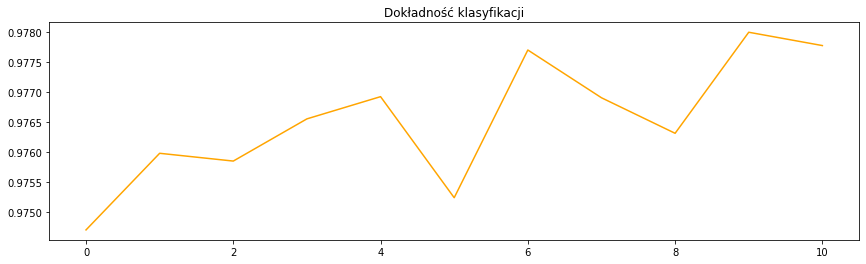

In [33]:
f1 = tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=0, patience=5, mode="auto")
f2 = tf.keras.callbacks.ModelCheckpoint(filepath='modely', save_weights_only = False, monitor = 'accuracy', mode='max', save_best_only = True)
f3 = tf.keras.callbacks.TensorBoard(log_dir='./logs')
history4 = model.fit(
    x=X_train,
    y=Y_train,
    batch_size=256,
    epochs=100,
    verbose="auto",
    callbacks= [f1,f2,f3],
    validation_split=0.1,
    )
trained_model = keras.models.load_model('modely')
train_accuracy = trained_model.evaluate(X_train, Y_train)
test_accuracy = trained_model.evaluate(X_test, Y_test)
print(train_accuracy + test_accuracy)
print('Dokładności klasyfikacji na materiale treningowym  = ',train_accuracy)
print('dokładności klasyfikacji na materiale testowym  = ',test_accuracy)
summarize_diagnostics(history4)

### Poprawa wyniku
* Spróbuj stworzyć 3 sieci, które uzyskają lepszy wynik na zbiorze fashion_mnist. Możesz zmodyfikować naszą prostą sieć lub zaprojektować zupełnie nową. 
* Poeksperymentuj z modyfikacjami warstw Conv2D (np. zmiana liczby filtrów), dodawaniem warstw Conv2D i Dense. Możesz też dodać Dropout. 
* Dla każdej z tych sieci przeprowadź ewaluację i wypisz wyniki. 

**Sieć CNN nr 1 (dodatkowa warstwa Conv2D)**

In [34]:
model = Sequential([
  Conv2D(16, kernel_size=(3,3), padding='same',activation='relu', input_shape = insh),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(32, kernel_size=(3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(64, kernel_size=(3,3), activation='relu'),
  Flatten(),
  Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 4, 4, 64)          18496     
                                                                 
 flatten_4 (Flatten)         (None, 1024)             

Epoch 1/100
211/211 [==============================] - ETA: 0s - loss: 0.7708 - accuracy: 0.7349

211/211 [==============================] - 3s 11ms/step - loss: 0.7708 - accuracy: 0.7349 - val_loss: 0.4784 - val_accuracy: 0.8228
Epoch 2/100
204/211 [============================>.] - ETA: 0s - loss: 0.4327 - accuracy: 0.8458

211/211 [==============================] - 2s 9ms/step - loss: 0.4319 - accuracy: 0.8461 - val_loss: 0.4047 - val_accuracy: 0.8507
Epoch 3/100
206/211 [============================>.] - ETA: 0s - loss: 0.3747 - accuracy: 0.8668

211/211 [==============================] - 2s 9ms/step - loss: 0.3751 - accuracy: 0.8668 - val_loss: 0.3649 - val_accuracy: 0.8650
Epoch 4/100
207/211 [============================>.] - ETA: 0s - loss: 0.3447 - accuracy: 0.8765

211/211 [==============================] - 2s 9ms/step - loss: 0.3444 - accuracy: 0.8766 - val_loss: 0.3407 - val_accuracy: 0.8807
Epoch 5/100
202/211 [===========================>..] - ETA: 0s - loss: 0.3238 - accuracy: 0.8836

211/211 [==============================] - 2s 9ms/step - loss: 0.3233 - accuracy: 0.8836 - val_loss: 0.3231 - val_accuracy: 0.8818
Epoch 6/100
201/211 [===========================>..] - ETA: 0s - loss: 0.3018 - accuracy: 0.8914

211/211 [==============================] - 2s 9ms/step - loss: 0.3015 - accuracy: 0.8916 - val_loss: 0.3202 - val_accuracy: 0.8823
Epoch 7/100
209/211 [============================>.] - ETA: 0s - loss: 0.2867 - accuracy: 0.8962

211/211 [==============================] - 2s 9ms/step - loss: 0.2871 - accuracy: 0.8959 - val_loss: 0.2936 - val_accuracy: 0.8935
Epoch 8/100
208/211 [============================>.] - ETA: 0s - loss: 0.2724 - accuracy: 0.9015

211/211 [==============================] - 2s 10ms/step - loss: 0.2726 - accuracy: 0.9014 - val_loss: 0.3031 - val_accuracy: 0.8893
Epoch 9/100
204/211 [============================>.] - ETA: 0s - loss: 0.2657 - accuracy: 0.9043

211/211 [==============================] - 2s 9ms/step - loss: 0.2653 - accuracy: 0.9044 - val_loss: 0.2946 - val_accuracy: 0.8923
Epoch 10/100
203/211 [===========================>..] - ETA: 0s - loss: 0.2523 - accuracy: 0.9098

211/211 [==============================] - 2s 9ms/step - loss: 0.2527 - accuracy: 0.9098 - val_loss: 0.2753 - val_accuracy: 0.9017
Epoch 11/100
211/211 [==============================] - ETA: 0s - loss: 0.2454 - accuracy: 0.9106

211/211 [==============================] - 2s 9ms/step - loss: 0.2454 - accuracy: 0.9106 - val_loss: 0.2781 - val_accuracy: 0.8988
Epoch 12/100
202/211 [===========================>..] - ETA: 0s - loss: 0.2368 - accuracy: 0.9147

211/211 [==============================] - 2s 9ms/step - loss: 0.2367 - accuracy: 0.9146 - val_loss: 0.2945 - val_accuracy: 0.8910
Epoch 13/100
209/211 [============================>.] - ETA: 0s - loss: 0.2332 - accuracy: 0.9151

211/211 [==============================] - 2s 9ms/step - loss: 0.2330 - accuracy: 0.9152 - val_loss: 0.2566 - val_accuracy: 0.9088
Epoch 14/100
209/211 [============================>.] - ETA: 0s - loss: 0.2224 - accuracy: 0.9196

211/211 [==============================] - 2s 10ms/step - loss: 0.2226 - accuracy: 0.9194 - val_loss: 0.2574 - val_accuracy: 0.9093
Epoch 15/100
209/211 [============================>.] - ETA: 0s - loss: 0.2169 - accuracy: 0.9223

211/211 [==============================] - 2s 9ms/step - loss: 0.2169 - accuracy: 0.9223 - val_loss: 0.2718 - val_accuracy: 0.9042
Epoch 16/100
204/211 [============================>.] - ETA: 0s - loss: 0.2100 - accuracy: 0.9231

211/211 [==============================] - 2s 9ms/step - loss: 0.2103 - accuracy: 0.9230 - val_loss: 0.2462 - val_accuracy: 0.9105
Epoch 17/100
209/211 [============================>.] - ETA: 0s - loss: 0.2044 - accuracy: 0.9256

211/211 [==============================] - 2s 9ms/step - loss: 0.2045 - accuracy: 0.9256 - val_loss: 0.2516 - val_accuracy: 0.9087
Epoch 18/100
209/211 [============================>.] - ETA: 0s - loss: 0.2026 - accuracy: 0.9269

211/211 [==============================] - 2s 9ms/step - loss: 0.2025 - accuracy: 0.9271 - val_loss: 0.2556 - val_accuracy: 0.9082
Epoch 19/100
210/211 [============================>.] - ETA: 0s - loss: 0.1934 - accuracy: 0.9296

211/211 [==============================] - 2s 9ms/step - loss: 0.1935 - accuracy: 0.9295 - val_loss: 0.2487 - val_accuracy: 0.9057
Epoch 20/100
205/211 [============================>.] - ETA: 0s - loss: 0.1897 - accuracy: 0.9311

211/211 [==============================] - 2s 10ms/step - loss: 0.1898 - accuracy: 0.9312 - val_loss: 0.2391 - val_accuracy: 0.9157
Epoch 21/100
203/211 [===========================>..] - ETA: 0s - loss: 0.1871 - accuracy: 0.9328

211/211 [==============================] - 2s 9ms/step - loss: 0.1871 - accuracy: 0.9329 - val_loss: 0.2464 - val_accuracy: 0.9120
Epoch 22/100
210/211 [============================>.] - ETA: 0s - loss: 0.1807 - accuracy: 0.9352

211/211 [==============================] - 2s 9ms/step - loss: 0.1804 - accuracy: 0.9353 - val_loss: 0.2394 - val_accuracy: 0.9135
Epoch 23/100
209/211 [============================>.] - ETA: 0s - loss: 0.1771 - accuracy: 0.9358

211/211 [==============================] - 2s 9ms/step - loss: 0.1772 - accuracy: 0.9358 - val_loss: 0.2545 - val_accuracy: 0.9095
Epoch 24/100
211/211 [==============================] - ETA: 0s - loss: 0.1713 - accuracy: 0.9378

211/211 [==============================] - 2s 9ms/step - loss: 0.1713 - accuracy: 0.9378 - val_loss: 0.2458 - val_accuracy: 0.9105
Epoch 25/100
210/211 [============================>.] - ETA: 0s - loss: 0.1644 - accuracy: 0.9410

211/211 [==============================] - 2s 9ms/step - loss: 0.1646 - accuracy: 0.9410 - val_loss: 0.2489 - val_accuracy: 0.9132
Epoch 26/100
203/211 [===========================>..] - ETA: 0s - loss: 0.1617 - accuracy: 0.9419

211/211 [==============================] - 2s 10ms/step - loss: 0.1617 - accuracy: 0.9417 - val_loss: 0.2502 - val_accuracy: 0.9120
Epoch 27/100
210/211 [============================>.] - ETA: 0s - loss: 0.1585 - accuracy: 0.9430

211/211 [==============================] - 3s 13ms/step - loss: 0.1590 - accuracy: 0.9429 - val_loss: 0.2514 - val_accuracy: 0.9135
Epoch 28/100
207/211 [============================>.] - ETA: 0s - loss: 0.1557 - accuracy: 0.9436

211/211 [==============================] - 2s 9ms/step - loss: 0.1556 - accuracy: 0.9437 - val_loss: 0.2346 - val_accuracy: 0.9165
Epoch 29/100
207/211 [============================>.] - ETA: 0s - loss: 0.1510 - accuracy: 0.9461

211/211 [==============================] - 2s 9ms/step - loss: 0.1509 - accuracy: 0.9462 - val_loss: 0.2372 - val_accuracy: 0.9175
Epoch 30/100
203/211 [===========================>..] - ETA: 0s - loss: 0.1471 - accuracy: 0.9471

211/211 [==============================] - 2s 9ms/step - loss: 0.1469 - accuracy: 0.9471 - val_loss: 0.2479 - val_accuracy: 0.9117
Epoch 31/100
204/211 [============================>.] - ETA: 0s - loss: 0.1429 - accuracy: 0.9486

211/211 [==============================] - 2s 9ms/step - loss: 0.1433 - accuracy: 0.9484 - val_loss: 0.2497 - val_accuracy: 0.9157
Epoch 32/100
211/211 [==============================] - ETA: 0s - loss: 0.1390 - accuracy: 0.9494

211/211 [==============================] - 2s 9ms/step - loss: 0.1390 - accuracy: 0.9494 - val_loss: 0.2402 - val_accuracy: 0.9152
Epoch 33/100
207/211 [============================>.] - ETA: 0s - loss: 0.1368 - accuracy: 0.9506

211/211 [==============================] - 2s 9ms/step - loss: 0.1368 - accuracy: 0.9506 - val_loss: 0.2455 - val_accuracy: 0.9175
Epoch 34/100
203/211 [===========================>..] - ETA: 0s - loss: 0.1347 - accuracy: 0.9518

211/211 [==============================] - 2s 10ms/step - loss: 0.1346 - accuracy: 0.9518 - val_loss: 0.2613 - val_accuracy: 0.9110
Epoch 35/100
208/211 [============================>.] - ETA: 0s - loss: 0.1296 - accuracy: 0.9529

211/211 [==============================] - 2s 9ms/step - loss: 0.1296 - accuracy: 0.9528 - val_loss: 0.2727 - val_accuracy: 0.9058
Epoch 36/100
205/211 [============================>.] - ETA: 0s - loss: 0.1258 - accuracy: 0.9545

211/211 [==============================] - 2s 9ms/step - loss: 0.1264 - accuracy: 0.9541 - val_loss: 0.2493 - val_accuracy: 0.9153
Epoch 37/100
210/211 [============================>.] - ETA: 0s - loss: 0.1260 - accuracy: 0.9542

211/211 [==============================] - 2s 9ms/step - loss: 0.1259 - accuracy: 0.9543 - val_loss: 0.2478 - val_accuracy: 0.9158
Epoch 38/100
209/211 [============================>.] - ETA: 0s - loss: 0.1169 - accuracy: 0.9581

211/211 [==============================] - 2s 9ms/step - loss: 0.1167 - accuracy: 0.9582 - val_loss: 0.2614 - val_accuracy: 0.9098
Epoch 39/100
211/211 [==============================] - 1s 6ms/step - loss: 0.1172 - accuracy: 0.9580 - val_loss: 0.2628 - val_accuracy: 0.9135
Epoch 40/100
211/211 [==============================] - 1s 6ms/step - loss: 0.1152 - accuracy: 0.9579 - val_loss: 0.2499 - val_accuracy: 0.9167
Epoch 41/100
211/211 [==============================] - ETA: 0s - loss: 0.1096 - accuracy: 0.9608

211/211 [==============================] - 2s 9ms/step - loss: 0.1096 - accuracy: 0.9608 - val_loss: 0.2537 - val_accuracy: 0.9150
Epoch 42/100
207/211 [============================>.] - ETA: 0s - loss: 0.1061 - accuracy: 0.9625

211/211 [==============================] - 2s 10ms/step - loss: 0.1061 - accuracy: 0.9626 - val_loss: 0.2758 - val_accuracy: 0.9070
Epoch 43/100
211/211 [==============================] - 1s 6ms/step - loss: 0.1067 - accuracy: 0.9617 - val_loss: 0.2706 - val_accuracy: 0.9148
Epoch 44/100
202/211 [===========================>..] - ETA: 0s - loss: 0.1003 - accuracy: 0.9646

211/211 [==============================] - 2s 9ms/step - loss: 0.1002 - accuracy: 0.9645 - val_loss: 0.2663 - val_accuracy: 0.9150
Epoch 45/100
211/211 [==============================] - 1s 6ms/step - loss: 0.1003 - accuracy: 0.9637 - val_loss: 0.2703 - val_accuracy: 0.9152
Epoch 46/100
207/211 [============================>.] - ETA: 0s - loss: 0.0956 - accuracy: 0.9653

211/211 [==============================] - 2s 9ms/step - loss: 0.0964 - accuracy: 0.9650 - val_loss: 0.2785 - val_accuracy: 0.9140
Epoch 47/100
209/211 [============================>.] - ETA: 0s - loss: 0.0972 - accuracy: 0.9652

211/211 [==============================] - 2s 9ms/step - loss: 0.0971 - accuracy: 0.9652 - val_loss: 0.3052 - val_accuracy: 0.9063
Epoch 48/100
211/211 [==============================] - ETA: 0s - loss: 0.0932 - accuracy: 0.9659

211/211 [==============================] - 2s 9ms/step - loss: 0.0932 - accuracy: 0.9659 - val_loss: 0.2765 - val_accuracy: 0.9152
Epoch 49/100
209/211 [============================>.] - ETA: 0s - loss: 0.0907 - accuracy: 0.9673

211/211 [==============================] - 2s 9ms/step - loss: 0.0906 - accuracy: 0.9672 - val_loss: 0.2784 - val_accuracy: 0.9135
Epoch 50/100
210/211 [============================>.] - ETA: 0s - loss: 0.0859 - accuracy: 0.9703

211/211 [==============================] - 2s 10ms/step - loss: 0.0859 - accuracy: 0.9702 - val_loss: 0.2843 - val_accuracy: 0.9110
Epoch 51/100
211/211 [==============================] - 1s 6ms/step - loss: 0.0850 - accuracy: 0.9696 - val_loss: 0.3040 - val_accuracy: 0.9110
Epoch 52/100
210/211 [============================>.] - ETA: 0s - loss: 0.0818 - accuracy: 0.9706

211/211 [==============================] - 2s 9ms/step - loss: 0.0818 - accuracy: 0.9706 - val_loss: 0.3150 - val_accuracy: 0.9115
Epoch 53/100
211/211 [==============================] - 1s 6ms/step - loss: 0.0816 - accuracy: 0.9703 - val_loss: 0.3119 - val_accuracy: 0.9112
Epoch 54/100
210/211 [============================>.] - ETA: 0s - loss: 0.0790 - accuracy: 0.9719

211/211 [==============================] - 2s 9ms/step - loss: 0.0789 - accuracy: 0.9720 - val_loss: 0.3066 - val_accuracy: 0.9122
Epoch 55/100
209/211 [============================>.] - ETA: 0s - loss: 0.0748 - accuracy: 0.9734

211/211 [==============================] - 2s 9ms/step - loss: 0.0748 - accuracy: 0.9734 - val_loss: 0.3047 - val_accuracy: 0.9117
Epoch 56/100
202/211 [===========================>..] - ETA: 0s - loss: 0.0730 - accuracy: 0.9747

211/211 [==============================] - 2s 9ms/step - loss: 0.0736 - accuracy: 0.9745 - val_loss: 0.3174 - val_accuracy: 0.9107
Epoch 57/100
207/211 [============================>.] - ETA: 0s - loss: 0.0723 - accuracy: 0.9747

211/211 [==============================] - 2s 9ms/step - loss: 0.0725 - accuracy: 0.9748 - val_loss: 0.3397 - val_accuracy: 0.9120
Epoch 58/100
211/211 [==============================] - 1s 6ms/step - loss: 0.0702 - accuracy: 0.9747 - val_loss: 0.3264 - val_accuracy: 0.9108
Epoch 59/100
210/211 [============================>.] - ETA: 0s - loss: 0.0689 - accuracy: 0.9753

211/211 [==============================] - 2s 9ms/step - loss: 0.0689 - accuracy: 0.9753 - val_loss: 0.3372 - val_accuracy: 0.9103
Epoch 60/100
210/211 [============================>.] - ETA: 0s - loss: 0.0638 - accuracy: 0.9779

211/211 [==============================] - 2s 10ms/step - loss: 0.0637 - accuracy: 0.9780 - val_loss: 0.3594 - val_accuracy: 0.9095
Epoch 61/100
205/211 [============================>.] - ETA: 0s - loss: 0.0633 - accuracy: 0.9782

211/211 [==============================] - 2s 9ms/step - loss: 0.0633 - accuracy: 0.9783 - val_loss: 0.3455 - val_accuracy: 0.9068
Epoch 62/100
209/211 [============================>.] - ETA: 0s - loss: 0.0590 - accuracy: 0.9793

211/211 [==============================] - 2s 9ms/step - loss: 0.0589 - accuracy: 0.9792 - val_loss: 0.3538 - val_accuracy: 0.9063
Epoch 63/100
211/211 [==============================] - 1s 6ms/step - loss: 0.0620 - accuracy: 0.9777 - val_loss: 0.3515 - val_accuracy: 0.9097
Epoch 64/100
209/211 [============================>.] - ETA: 0s - loss: 0.0580 - accuracy: 0.9796

211/211 [==============================] - 2s 9ms/step - loss: 0.0580 - accuracy: 0.9797 - val_loss: 0.3539 - val_accuracy: 0.9052
Epoch 65/100
211/211 [==============================] - 1s 6ms/step - loss: 0.0593 - accuracy: 0.9785 - val_loss: 0.3853 - val_accuracy: 0.9055
Epoch 66/100
211/211 [==============================] - ETA: 0s - loss: 0.0541 - accuracy: 0.9812

211/211 [==============================] - 2s 9ms/step - loss: 0.0541 - accuracy: 0.9812 - val_loss: 0.3751 - val_accuracy: 0.9075
Epoch 67/100
202/211 [===========================>..] - ETA: 0s - loss: 0.0545 - accuracy: 0.9816

211/211 [==============================] - 2s 9ms/step - loss: 0.0542 - accuracy: 0.9816 - val_loss: 0.3757 - val_accuracy: 0.9100
Epoch 68/100
208/211 [============================>.] - ETA: 0s - loss: 0.0510 - accuracy: 0.9822

211/211 [==============================] - 2s 10ms/step - loss: 0.0510 - accuracy: 0.9821 - val_loss: 0.3870 - val_accuracy: 0.9080
Epoch 69/100
209/211 [============================>.] - ETA: 0s - loss: 0.0511 - accuracy: 0.9822

211/211 [==============================] - 2s 9ms/step - loss: 0.0511 - accuracy: 0.9822 - val_loss: 0.4014 - val_accuracy: 0.9027
Epoch 70/100
211/211 [==============================] - 1s 6ms/step - loss: 0.0514 - accuracy: 0.9818 - val_loss: 0.3937 - val_accuracy: 0.9067
Epoch 71/100
209/211 [============================>.] - ETA: 0s - loss: 0.0473 - accuracy: 0.9836

211/211 [==============================] - 2s 9ms/step - loss: 0.0474 - accuracy: 0.9836 - val_loss: 0.4104 - val_accuracy: 0.9093
Epoch 72/100
207/211 [============================>.] - ETA: 0s - loss: 0.0438 - accuracy: 0.9853

211/211 [==============================] - 2s 9ms/step - loss: 0.0438 - accuracy: 0.9853 - val_loss: 0.3979 - val_accuracy: 0.9042
Epoch 73/100
204/211 [============================>.] - ETA: 0s - loss: 0.0413 - accuracy: 0.9857

211/211 [==============================] - 2s 9ms/step - loss: 0.0415 - accuracy: 0.9856 - val_loss: 0.4329 - val_accuracy: 0.9077
Epoch 74/100
208/211 [============================>.] - ETA: 0s - loss: 0.0404 - accuracy: 0.9863

211/211 [==============================] - 2s 9ms/step - loss: 0.0406 - accuracy: 0.9863 - val_loss: 0.4318 - val_accuracy: 0.9040
Epoch 75/100
211/211 [==============================] - 1s 6ms/step - loss: 0.0433 - accuracy: 0.9845 - val_loss: 0.4226 - val_accuracy: 0.9080
Epoch 76/100
207/211 [============================>.] - ETA: 0s - loss: 0.0393 - accuracy: 0.9865

211/211 [==============================] - 2s 9ms/step - loss: 0.0395 - accuracy: 0.9864 - val_loss: 0.4241 - val_accuracy: 0.9058
Epoch 77/100
211/211 [==============================] - 1s 6ms/step - loss: 0.0409 - accuracy: 0.9859 - val_loss: 0.4427 - val_accuracy: 0.9068
Epoch 78/100
211/211 [==============================] - 1s 6ms/step - loss: 0.0403 - accuracy: 0.9861 - val_loss: 0.4483 - val_accuracy: 0.9055
Epoch 79/100
207/211 [============================>.] - ETA: 0s - loss: 0.0349 - accuracy: 0.9882

211/211 [==============================] - 2s 10ms/step - loss: 0.0349 - accuracy: 0.9882 - val_loss: 0.4577 - val_accuracy: 0.9053
Epoch 80/100
209/211 [============================>.] - ETA: 0s - loss: 0.0344 - accuracy: 0.9886

211/211 [==============================] - 2s 9ms/step - loss: 0.0346 - accuracy: 0.9885 - val_loss: 0.4676 - val_accuracy: 0.9050
Epoch 81/100
211/211 [==============================] - 1s 6ms/step - loss: 0.0397 - accuracy: 0.9858 - val_loss: 0.4565 - val_accuracy: 0.9058
Epoch 82/100
211/211 [==============================] - 1s 6ms/step - loss: 0.0343 - accuracy: 0.9883 - val_loss: 0.4760 - val_accuracy: 0.9058
Epoch 83/100
202/211 [===========================>..] - ETA: 0s - loss: 0.0326 - accuracy: 0.9885

211/211 [==============================] - 2s 9ms/step - loss: 0.0323 - accuracy: 0.9887 - val_loss: 0.4751 - val_accuracy: 0.9055
Epoch 84/100
207/211 [============================>.] - ETA: 0s - loss: 0.0315 - accuracy: 0.9894

211/211 [==============================] - 2s 9ms/step - loss: 0.0316 - accuracy: 0.9894 - val_loss: 0.4880 - val_accuracy: 0.9050
Epoch 85/100
210/211 [============================>.] - ETA: 0s - loss: 0.0297 - accuracy: 0.9897

211/211 [==============================] - 2s 9ms/step - loss: 0.0298 - accuracy: 0.9896 - val_loss: 0.4871 - val_accuracy: 0.9050
Epoch 86/100
204/211 [============================>.] - ETA: 0s - loss: 0.0284 - accuracy: 0.9906

211/211 [==============================] - 2s 9ms/step - loss: 0.0282 - accuracy: 0.9907 - val_loss: 0.5137 - val_accuracy: 0.9058
Epoch 87/100
211/211 [==============================] - 1s 6ms/step - loss: 0.0286 - accuracy: 0.9904 - val_loss: 0.5154 - val_accuracy: 0.9028
Epoch 88/100
208/211 [============================>.] - ETA: 0s - loss: 0.0260 - accuracy: 0.9917

211/211 [==============================] - 2s 9ms/step - loss: 0.0260 - accuracy: 0.9917 - val_loss: 0.5185 - val_accuracy: 0.9062
Epoch 89/100
211/211 [==============================] - 1s 6ms/step - loss: 0.0273 - accuracy: 0.9911 - val_loss: 0.5298 - val_accuracy: 0.9037
Epoch 90/100
211/211 [==============================] - 1s 6ms/step - loss: 0.0296 - accuracy: 0.9897 - val_loss: 0.5220 - val_accuracy: 0.9050
Epoch 91/100
211/211 [==============================] - 1s 6ms/step - loss: 0.0269 - accuracy: 0.9901 - val_loss: 0.5342 - val_accuracy: 0.9078
Epoch 92/100
211/211 [==============================] - 1s 6ms/step - loss: 0.0262 - accuracy: 0.9909 - val_loss: 0.5539 - val_accuracy: 0.9022
Epoch 93/100
313/313 [==============================] - 1s 3ms/step - loss: 0.5748 - accuracy: 0.9050
[0.07415071874856949, 0.9829999804496765, 0.574819803237915, 0.9049999713897705]
Dokładności klasyfikacji na materiale treningowym  =  [0.07415071874856949, 0.9829999804496765]
dokładności kl

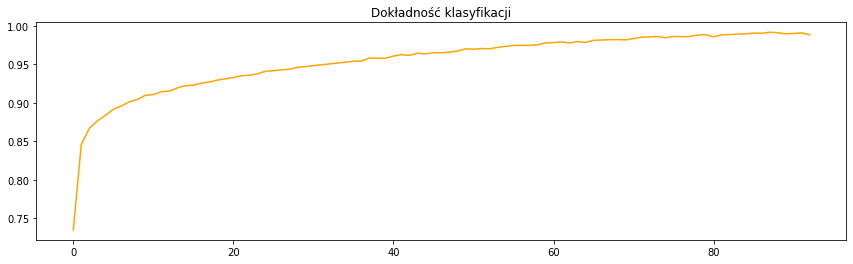

In [35]:
f1 = tf.keras.callbacks.EarlyStopping(monitor='loss', verbose=0, patience=5, mode="auto")
f2 = tf.keras.callbacks.ModelCheckpoint(filepath='modelz', save_weights_only = False, monitor = 'accuracy', mode='max', save_best_only = True)
f3 = tf.keras.callbacks.TensorBoard(log_dir='./logs')
history5 = model.fit(
    x=X_train,
    y=Y_train,
    batch_size=256,
    epochs=100,
    verbose="auto",
    callbacks= [f1,f2,f3],
    validation_split=0.1,
    )
trained_model = keras.models.load_model('modelz')
train_accuracy = trained_model.evaluate(X_train, Y_train)
test_accuracy = trained_model.evaluate(X_test, Y_test)
print(train_accuracy + test_accuracy)
print('Dokładności klasyfikacji na materiale treningowym  = ',train_accuracy)
print('dokładności klasyfikacji na materiale testowym  = ',test_accuracy)
summarize_diagnostics(history5)

**Sieć CNN nr 2 (dodatkowa warstwa Conv2D i Max_Pooling2D, więcej kanałów/map aktywacji)**

In [36]:
model = Sequential([
  Conv2D(32, kernel_size=(3,3), padding='same',activation='relu', input_shape = insh),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(64, kernel_size=(3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(128, kernel_size=(3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  Flatten(),
  Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 2, 2, 128)       

Epoch 1/100
211/211 [==============================] - ETA: 0s - loss: 0.7114 - accuracy: 0.7541

211/211 [==============================] - 3s 13ms/step - loss: 0.7114 - accuracy: 0.7541 - val_loss: 0.4774 - val_accuracy: 0.8255
Epoch 2/100
207/211 [============================>.] - ETA: 0s - loss: 0.4018 - accuracy: 0.8575

211/211 [==============================] - 3s 13ms/step - loss: 0.4026 - accuracy: 0.8571 - val_loss: 0.3846 - val_accuracy: 0.8610
Epoch 3/100
210/211 [============================>.] - ETA: 0s - loss: 0.3403 - accuracy: 0.8778

211/211 [==============================] - 3s 13ms/step - loss: 0.3404 - accuracy: 0.8778 - val_loss: 0.3495 - val_accuracy: 0.8682
Epoch 4/100
206/211 [============================>.] - ETA: 0s - loss: 0.3045 - accuracy: 0.8896

211/211 [==============================] - 2s 11ms/step - loss: 0.3038 - accuracy: 0.8898 - val_loss: 0.3057 - val_accuracy: 0.8877
Epoch 5/100
209/211 [============================>.] - ETA: 0s - loss: 0.2819 - accuracy: 0.8992

211/211 [==============================] - 3s 12ms/step - loss: 0.2816 - accuracy: 0.8995 - val_loss: 0.2917 - val_accuracy: 0.8900
Epoch 6/100
211/211 [==============================] - ETA: 0s - loss: 0.2637 - accuracy: 0.9046

211/211 [==============================] - 2s 11ms/step - loss: 0.2637 - accuracy: 0.9046 - val_loss: 0.2771 - val_accuracy: 0.8980
Epoch 7/100
210/211 [============================>.] - ETA: 0s - loss: 0.2449 - accuracy: 0.9111

211/211 [==============================] - 2s 11ms/step - loss: 0.2450 - accuracy: 0.9111 - val_loss: 0.2768 - val_accuracy: 0.8998
Epoch 8/100
209/211 [============================>.] - ETA: 0s - loss: 0.2378 - accuracy: 0.9144

211/211 [==============================] - 2s 11ms/step - loss: 0.2378 - accuracy: 0.9145 - val_loss: 0.2649 - val_accuracy: 0.9028
Epoch 9/100
208/211 [============================>.] - ETA: 0s - loss: 0.2242 - accuracy: 0.9183

211/211 [==============================] - 2s 11ms/step - loss: 0.2246 - accuracy: 0.9181 - val_loss: 0.2515 - val_accuracy: 0.9068
Epoch 10/100
209/211 [============================>.] - ETA: 0s - loss: 0.2161 - accuracy: 0.9219

211/211 [==============================] - 2s 12ms/step - loss: 0.2166 - accuracy: 0.9218 - val_loss: 0.2607 - val_accuracy: 0.9030
Epoch 11/100
209/211 [============================>.] - ETA: 0s - loss: 0.2036 - accuracy: 0.9267

211/211 [==============================] - 3s 12ms/step - loss: 0.2034 - accuracy: 0.9267 - val_loss: 0.2460 - val_accuracy: 0.9093
Epoch 12/100
211/211 [==============================] - ETA: 0s - loss: 0.1945 - accuracy: 0.9297

211/211 [==============================] - 2s 11ms/step - loss: 0.1945 - accuracy: 0.9297 - val_loss: 0.2463 - val_accuracy: 0.9068
Epoch 13/100
209/211 [============================>.] - ETA: 0s - loss: 0.1844 - accuracy: 0.9333

211/211 [==============================] - 2s 12ms/step - loss: 0.1844 - accuracy: 0.9333 - val_loss: 0.2397 - val_accuracy: 0.9133
Epoch 14/100
211/211 [==============================] - ETA: 0s - loss: 0.1772 - accuracy: 0.9361

211/211 [==============================] - 2s 11ms/step - loss: 0.1772 - accuracy: 0.9361 - val_loss: 0.2313 - val_accuracy: 0.9182
Epoch 15/100
206/211 [============================>.] - ETA: 0s - loss: 0.1695 - accuracy: 0.9378

211/211 [==============================] - 2s 11ms/step - loss: 0.1694 - accuracy: 0.9379 - val_loss: 0.2260 - val_accuracy: 0.9175
Epoch 16/100
210/211 [============================>.] - ETA: 0s - loss: 0.1591 - accuracy: 0.9426

211/211 [==============================] - 2s 11ms/step - loss: 0.1593 - accuracy: 0.9425 - val_loss: 0.2321 - val_accuracy: 0.9182
Epoch 17/100
211/211 [==============================] - ETA: 0s - loss: 0.1523 - accuracy: 0.9458

211/211 [==============================] - 2s 11ms/step - loss: 0.1523 - accuracy: 0.9458 - val_loss: 0.2379 - val_accuracy: 0.9163
Epoch 18/100
209/211 [============================>.] - ETA: 0s - loss: 0.1440 - accuracy: 0.9486

211/211 [==============================] - 3s 12ms/step - loss: 0.1443 - accuracy: 0.9484 - val_loss: 0.2222 - val_accuracy: 0.9198
Epoch 19/100
205/211 [============================>.] - ETA: 0s - loss: 0.1316 - accuracy: 0.9523

211/211 [==============================] - 2s 11ms/step - loss: 0.1325 - accuracy: 0.9521 - val_loss: 0.2261 - val_accuracy: 0.9217
Epoch 20/100
211/211 [==============================] - ETA: 0s - loss: 0.1283 - accuracy: 0.9548

211/211 [==============================] - 2s 12ms/step - loss: 0.1283 - accuracy: 0.9548 - val_loss: 0.2320 - val_accuracy: 0.9218
Epoch 21/100
211/211 [==============================] - ETA: 0s - loss: 0.1211 - accuracy: 0.9571

211/211 [==============================] - 2s 11ms/step - loss: 0.1211 - accuracy: 0.9571 - val_loss: 0.2406 - val_accuracy: 0.9177
Epoch 22/100
210/211 [============================>.] - ETA: 0s - loss: 0.1182 - accuracy: 0.9574

211/211 [==============================] - 2s 11ms/step - loss: 0.1180 - accuracy: 0.9575 - val_loss: 0.2326 - val_accuracy: 0.9230
Epoch 23/100
210/211 [============================>.] - ETA: 0s - loss: 0.1120 - accuracy: 0.9591

211/211 [==============================] - 2s 11ms/step - loss: 0.1119 - accuracy: 0.9592 - val_loss: 0.2533 - val_accuracy: 0.9147
Epoch 24/100
210/211 [============================>.] - ETA: 0s - loss: 0.1057 - accuracy: 0.9624

211/211 [==============================] - 3s 12ms/step - loss: 0.1059 - accuracy: 0.9623 - val_loss: 0.2621 - val_accuracy: 0.9135
Epoch 25/100
209/211 [============================>.] - ETA: 0s - loss: 0.0971 - accuracy: 0.9644

211/211 [==============================] - 2s 11ms/step - loss: 0.0972 - accuracy: 0.9644 - val_loss: 0.2412 - val_accuracy: 0.9193
Epoch 26/100
209/211 [============================>.] - ETA: 0s - loss: 0.0938 - accuracy: 0.9662

211/211 [==============================] - 2s 11ms/step - loss: 0.0939 - accuracy: 0.9663 - val_loss: 0.2449 - val_accuracy: 0.9212
Epoch 27/100
210/211 [============================>.] - ETA: 0s - loss: 0.0834 - accuracy: 0.9707

211/211 [==============================] - 2s 11ms/step - loss: 0.0833 - accuracy: 0.9708 - val_loss: 0.2765 - val_accuracy: 0.9157
Epoch 28/100
211/211 [==============================] - ETA: 0s - loss: 0.0784 - accuracy: 0.9723

211/211 [==============================] - 2s 11ms/step - loss: 0.0784 - accuracy: 0.9723 - val_loss: 0.2539 - val_accuracy: 0.9212
Epoch 29/100
209/211 [============================>.] - ETA: 0s - loss: 0.0760 - accuracy: 0.9731

211/211 [==============================] - 2s 11ms/step - loss: 0.0760 - accuracy: 0.9731 - val_loss: 0.2890 - val_accuracy: 0.9157
Epoch 30/100
205/211 [============================>.] - ETA: 0s - loss: 0.0682 - accuracy: 0.9760

211/211 [==============================] - 3s 13ms/step - loss: 0.0689 - accuracy: 0.9757 - val_loss: 0.2749 - val_accuracy: 0.9180
Epoch 31/100
205/211 [============================>.] - ETA: 0s - loss: 0.0672 - accuracy: 0.9764

211/211 [==============================] - 2s 12ms/step - loss: 0.0677 - accuracy: 0.9763 - val_loss: 0.2968 - val_accuracy: 0.9157
Epoch 32/100
207/211 [============================>.] - ETA: 0s - loss: 0.0619 - accuracy: 0.9785

211/211 [==============================] - 2s 11ms/step - loss: 0.0618 - accuracy: 0.9787 - val_loss: 0.2909 - val_accuracy: 0.9160
Epoch 33/100
208/211 [============================>.] - ETA: 0s - loss: 0.0561 - accuracy: 0.9815

211/211 [==============================] - 2s 11ms/step - loss: 0.0560 - accuracy: 0.9816 - val_loss: 0.2988 - val_accuracy: 0.9178
Epoch 34/100
211/211 [==============================] - ETA: 0s - loss: 0.0497 - accuracy: 0.9830

211/211 [==============================] - 2s 11ms/step - loss: 0.0497 - accuracy: 0.9830 - val_loss: 0.2853 - val_accuracy: 0.9228
Epoch 35/100
205/211 [============================>.] - ETA: 0s - loss: 0.0478 - accuracy: 0.9834

211/211 [==============================] - 2s 11ms/step - loss: 0.0478 - accuracy: 0.9834 - val_loss: 0.3066 - val_accuracy: 0.9205
Epoch 36/100
208/211 [============================>.] - ETA: 0s - loss: 0.0438 - accuracy: 0.9853

211/211 [==============================] - 3s 12ms/step - loss: 0.0439 - accuracy: 0.9852 - val_loss: 0.3045 - val_accuracy: 0.9232
Epoch 37/100
207/211 [============================>.] - ETA: 0s - loss: 0.0374 - accuracy: 0.9885

211/211 [==============================] - 2s 12ms/step - loss: 0.0374 - accuracy: 0.9884 - val_loss: 0.3313 - val_accuracy: 0.9178
Epoch 38/100
211/211 [==============================] - 2s 8ms/step - loss: 0.0370 - accuracy: 0.9881 - val_loss: 0.3436 - val_accuracy: 0.9198
Epoch 39/100
211/211 [==============================] - 2s 8ms/step - loss: 0.0397 - accuracy: 0.9866 - val_loss: 0.3474 - val_accuracy: 0.9200
Epoch 40/100
211/211 [==============================] - 2s 8ms/step - loss: 0.0340 - accuracy: 0.9884 - val_loss: 0.3437 - val_accuracy: 0.9203
Epoch 41/100
211/211 [==============================] - 2s 8ms/step - loss: 0.0347 - accuracy: 0.9882 - val_loss: 0.3644 - val_accuracy: 0.9173
Epoch 42/100
210/211 [============================>.] - ETA: 0s - loss: 0.0254 - accuracy: 0.9923

211/211 [==============================] - 2s 11ms/step - loss: 0.0253 - accuracy: 0.9924 - val_loss: 0.3901 - val_accuracy: 0.9190
Epoch 43/100
211/211 [==============================] - 2s 8ms/step - loss: 0.0297 - accuracy: 0.9900 - val_loss: 0.4174 - val_accuracy: 0.9125
Epoch 44/100
211/211 [==============================] - 2s 8ms/step - loss: 0.0261 - accuracy: 0.9919 - val_loss: 0.3900 - val_accuracy: 0.9187
Epoch 45/100
209/211 [============================>.] - ETA: 0s - loss: 0.0183 - accuracy: 0.9946

211/211 [==============================] - 2s 12ms/step - loss: 0.0183 - accuracy: 0.9947 - val_loss: 0.3990 - val_accuracy: 0.9165
Epoch 46/100
211/211 [==============================] - 2s 8ms/step - loss: 0.0215 - accuracy: 0.9929 - val_loss: 0.3904 - val_accuracy: 0.9188
Epoch 47/100
211/211 [==============================] - 2s 8ms/step - loss: 0.0246 - accuracy: 0.9918 - val_loss: 0.4573 - val_accuracy: 0.9137
Epoch 48/100
211/211 [==============================] - 2s 8ms/step - loss: 0.0244 - accuracy: 0.9917 - val_loss: 0.4150 - val_accuracy: 0.9178
Epoch 49/100
211/211 [==============================] - 2s 8ms/step - loss: 0.0215 - accuracy: 0.9930 - val_loss: 0.4214 - val_accuracy: 0.9185
Epoch 50/100
313/313 [==============================] - 1s 3ms/step - loss: 0.4485 - accuracy: 0.9069
[0.06751485913991928, 0.9818666577339172, 0.44846436381340027, 0.9068999886512756]
Dokładności klasyfikacji na materiale treningowym  =  [0.06751485913991928, 0.9818666577339172]
dokładności

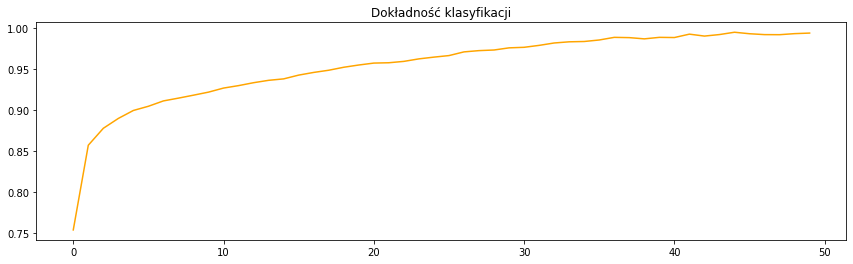

In [37]:
f1 = tf.keras.callbacks.EarlyStopping(monitor='loss', verbose=0, patience=5, mode="auto")
f2 = tf.keras.callbacks.ModelCheckpoint(filepath='modelw', save_weights_only = False, monitor = 'accuracy', mode='max', save_best_only = True)
f3 = tf.keras.callbacks.TensorBoard(log_dir='./logs')
history6 = model.fit(
    x=X_train,
    y=Y_train,
    batch_size=256,
    epochs=100,
    verbose="auto",
    callbacks= [f1,f2,f3],
    validation_split=0.1,
    )
trained_model = keras.models.load_model('modelw')
train_accuracy = trained_model.evaluate(X_train, Y_train)
test_accuracy = trained_model.evaluate(X_test, Y_test)
print(train_accuracy + test_accuracy)
print('Dokładności klasyfikacji na materiale treningowym  = ',train_accuracy)
print('dokładności klasyfikacji na materiale testowym  = ',test_accuracy)
summarize_diagnostics(history6)

**Sieć CNN nr 3 (dodatkowa warstwa Conv2D, Max_Pooling2D, Dense i Dropout)**

In [38]:
from keras.layers import Dropout

In [39]:
model = Sequential([
  Conv2D(16, kernel_size=(3,3), padding='same',activation='relu', input_shape = insh),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(32, kernel_size=(3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(64, kernel_size=(3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  Dropout(0.25),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 12, 12, 32)        4640      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 4, 4, 64)          18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 2, 2, 64)        

Epoch 1/100
208/211 [============================>.] - ETA: 0s - loss: 0.8414 - accuracy: 0.6960

211/211 [==============================] - 3s 11ms/step - loss: 0.8373 - accuracy: 0.6975 - val_loss: 0.5006 - val_accuracy: 0.8178
Epoch 2/100
207/211 [============================>.] - ETA: 0s - loss: 0.5049 - accuracy: 0.8179

211/211 [==============================] - 2s 11ms/step - loss: 0.5037 - accuracy: 0.8182 - val_loss: 0.4276 - val_accuracy: 0.8450
Epoch 3/100
206/211 [============================>.] - ETA: 0s - loss: 0.4299 - accuracy: 0.8463

211/211 [==============================] - 2s 10ms/step - loss: 0.4303 - accuracy: 0.8463 - val_loss: 0.3871 - val_accuracy: 0.8600
Epoch 4/100
206/211 [============================>.] - ETA: 0s - loss: 0.3867 - accuracy: 0.8615

211/211 [==============================] - 2s 10ms/step - loss: 0.3863 - accuracy: 0.8616 - val_loss: 0.3504 - val_accuracy: 0.8725
Epoch 5/100
206/211 [============================>.] - ETA: 0s - loss: 0.3607 - accuracy: 0.8723

211/211 [==============================] - 2s 10ms/step - loss: 0.3598 - accuracy: 0.8725 - val_loss: 0.3339 - val_accuracy: 0.8805
Epoch 6/100
206/211 [============================>.] - ETA: 0s - loss: 0.3431 - accuracy: 0.8777

211/211 [==============================] - 2s 10ms/step - loss: 0.3427 - accuracy: 0.8779 - val_loss: 0.3139 - val_accuracy: 0.8833
Epoch 7/100
205/211 [============================>.] - ETA: 0s - loss: 0.3248 - accuracy: 0.8830

211/211 [==============================] - 2s 11ms/step - loss: 0.3250 - accuracy: 0.8830 - val_loss: 0.3036 - val_accuracy: 0.8887
Epoch 8/100
204/211 [============================>.] - ETA: 0s - loss: 0.3164 - accuracy: 0.8850

211/211 [==============================] - 2s 11ms/step - loss: 0.3164 - accuracy: 0.8851 - val_loss: 0.2934 - val_accuracy: 0.8942
Epoch 9/100
208/211 [============================>.] - ETA: 0s - loss: 0.3060 - accuracy: 0.8879

211/211 [==============================] - 3s 13ms/step - loss: 0.3059 - accuracy: 0.8880 - val_loss: 0.2815 - val_accuracy: 0.8947
Epoch 10/100
206/211 [============================>.] - ETA: 0s - loss: 0.2932 - accuracy: 0.8938

211/211 [==============================] - 2s 10ms/step - loss: 0.2939 - accuracy: 0.8936 - val_loss: 0.2695 - val_accuracy: 0.8998
Epoch 11/100
206/211 [============================>.] - ETA: 0s - loss: 0.2859 - accuracy: 0.8953

211/211 [==============================] - 2s 10ms/step - loss: 0.2853 - accuracy: 0.8955 - val_loss: 0.2743 - val_accuracy: 0.8987
Epoch 12/100
204/211 [============================>.] - ETA: 0s - loss: 0.2765 - accuracy: 0.8973

211/211 [==============================] - 2s 11ms/step - loss: 0.2764 - accuracy: 0.8971 - val_loss: 0.2650 - val_accuracy: 0.9018
Epoch 13/100
206/211 [============================>.] - ETA: 0s - loss: 0.2701 - accuracy: 0.9011

211/211 [==============================] - 2s 10ms/step - loss: 0.2709 - accuracy: 0.9008 - val_loss: 0.2685 - val_accuracy: 0.9007
Epoch 14/100
205/211 [============================>.] - ETA: 0s - loss: 0.2658 - accuracy: 0.9040

211/211 [==============================] - 2s 10ms/step - loss: 0.2655 - accuracy: 0.9040 - val_loss: 0.2558 - val_accuracy: 0.9047
Epoch 15/100
208/211 [============================>.] - ETA: 0s - loss: 0.2548 - accuracy: 0.9068

211/211 [==============================] - 2s 10ms/step - loss: 0.2549 - accuracy: 0.9069 - val_loss: 0.2631 - val_accuracy: 0.9000
Epoch 16/100
211/211 [==============================] - 1s 6ms/step - loss: 0.2528 - accuracy: 0.9068 - val_loss: 0.2505 - val_accuracy: 0.9068
Epoch 17/100
209/211 [============================>.] - ETA: 0s - loss: 0.2445 - accuracy: 0.9102

211/211 [==============================] - 2s 11ms/step - loss: 0.2446 - accuracy: 0.9100 - val_loss: 0.2429 - val_accuracy: 0.9082
Epoch 18/100
208/211 [============================>.] - ETA: 0s - loss: 0.2406 - accuracy: 0.9115

211/211 [==============================] - 2s 10ms/step - loss: 0.2404 - accuracy: 0.9115 - val_loss: 0.2451 - val_accuracy: 0.9103
Epoch 19/100
205/211 [============================>.] - ETA: 0s - loss: 0.2381 - accuracy: 0.9114

211/211 [==============================] - 2s 10ms/step - loss: 0.2372 - accuracy: 0.9117 - val_loss: 0.2324 - val_accuracy: 0.9135
Epoch 20/100
205/211 [============================>.] - ETA: 0s - loss: 0.2298 - accuracy: 0.9160

211/211 [==============================] - 2s 10ms/step - loss: 0.2297 - accuracy: 0.9160 - val_loss: 0.2378 - val_accuracy: 0.9108
Epoch 21/100
211/211 [==============================] - 1s 6ms/step - loss: 0.2271 - accuracy: 0.9156 - val_loss: 0.2315 - val_accuracy: 0.9153
Epoch 22/100
203/211 [===========================>..] - ETA: 0s - loss: 0.2221 - accuracy: 0.9180

211/211 [==============================] - 2s 10ms/step - loss: 0.2223 - accuracy: 0.9178 - val_loss: 0.2403 - val_accuracy: 0.9117
Epoch 23/100
203/211 [===========================>..] - ETA: 0s - loss: 0.2178 - accuracy: 0.9195

211/211 [==============================] - 2s 11ms/step - loss: 0.2185 - accuracy: 0.9193 - val_loss: 0.2387 - val_accuracy: 0.9133
Epoch 24/100
204/211 [============================>.] - ETA: 0s - loss: 0.2144 - accuracy: 0.9207

211/211 [==============================] - 2s 10ms/step - loss: 0.2148 - accuracy: 0.9205 - val_loss: 0.2329 - val_accuracy: 0.9148
Epoch 25/100
209/211 [============================>.] - ETA: 0s - loss: 0.2103 - accuracy: 0.9217

211/211 [==============================] - 2s 10ms/step - loss: 0.2103 - accuracy: 0.9218 - val_loss: 0.2245 - val_accuracy: 0.9180
Epoch 26/100
203/211 [===========================>..] - ETA: 0s - loss: 0.2082 - accuracy: 0.9235

211/211 [==============================] - 2s 10ms/step - loss: 0.2077 - accuracy: 0.9236 - val_loss: 0.2256 - val_accuracy: 0.9138
Epoch 27/100
204/211 [============================>.] - ETA: 0s - loss: 0.2070 - accuracy: 0.9236

211/211 [==============================] - 2s 10ms/step - loss: 0.2061 - accuracy: 0.9238 - val_loss: 0.2312 - val_accuracy: 0.9157
Epoch 28/100
207/211 [============================>.] - ETA: 0s - loss: 0.2015 - accuracy: 0.9254

211/211 [==============================] - 2s 11ms/step - loss: 0.2016 - accuracy: 0.9254 - val_loss: 0.2278 - val_accuracy: 0.9165
Epoch 29/100
211/211 [==============================] - ETA: 0s - loss: 0.1974 - accuracy: 0.9275

211/211 [==============================] - 2s 10ms/step - loss: 0.1974 - accuracy: 0.9275 - val_loss: 0.2212 - val_accuracy: 0.9207
Epoch 30/100
211/211 [==============================] - 1s 6ms/step - loss: 0.1947 - accuracy: 0.9270 - val_loss: 0.2223 - val_accuracy: 0.9152
Epoch 31/100
205/211 [============================>.] - ETA: 0s - loss: 0.1914 - accuracy: 0.9277

211/211 [==============================] - 2s 10ms/step - loss: 0.1910 - accuracy: 0.9279 - val_loss: 0.2263 - val_accuracy: 0.9198
Epoch 32/100
206/211 [============================>.] - ETA: 0s - loss: 0.1861 - accuracy: 0.9297

211/211 [==============================] - 2s 10ms/step - loss: 0.1862 - accuracy: 0.9297 - val_loss: 0.2190 - val_accuracy: 0.9190
Epoch 33/100
203/211 [===========================>..] - ETA: 0s - loss: 0.1863 - accuracy: 0.9307

211/211 [==============================] - 2s 10ms/step - loss: 0.1862 - accuracy: 0.9306 - val_loss: 0.2286 - val_accuracy: 0.9175
Epoch 34/100
204/211 [============================>.] - ETA: 0s - loss: 0.1840 - accuracy: 0.9311

211/211 [==============================] - 2s 11ms/step - loss: 0.1841 - accuracy: 0.9310 - val_loss: 0.2167 - val_accuracy: 0.9210
Epoch 35/100
206/211 [============================>.] - ETA: 0s - loss: 0.1799 - accuracy: 0.9329

211/211 [==============================] - 2s 10ms/step - loss: 0.1792 - accuracy: 0.9332 - val_loss: 0.2230 - val_accuracy: 0.9187
Epoch 36/100
206/211 [============================>.] - ETA: 0s - loss: 0.1760 - accuracy: 0.9336

211/211 [==============================] - 2s 10ms/step - loss: 0.1756 - accuracy: 0.9337 - val_loss: 0.2421 - val_accuracy: 0.9145
Epoch 37/100
203/211 [===========================>..] - ETA: 0s - loss: 0.1742 - accuracy: 0.9351

211/211 [==============================] - 2s 10ms/step - loss: 0.1741 - accuracy: 0.9351 - val_loss: 0.2223 - val_accuracy: 0.9195
Epoch 38/100
203/211 [===========================>..] - ETA: 0s - loss: 0.1694 - accuracy: 0.9364

211/211 [==============================] - 2s 10ms/step - loss: 0.1702 - accuracy: 0.9360 - val_loss: 0.2220 - val_accuracy: 0.9187
Epoch 39/100
204/211 [============================>.] - ETA: 0s - loss: 0.1696 - accuracy: 0.9365

211/211 [==============================] - 2s 10ms/step - loss: 0.1695 - accuracy: 0.9365 - val_loss: 0.2205 - val_accuracy: 0.9227
Epoch 40/100
209/211 [============================>.] - ETA: 0s - loss: 0.1660 - accuracy: 0.9388

211/211 [==============================] - 2s 11ms/step - loss: 0.1660 - accuracy: 0.9388 - val_loss: 0.2302 - val_accuracy: 0.9190
Epoch 41/100
211/211 [==============================] - 1s 6ms/step - loss: 0.1644 - accuracy: 0.9379 - val_loss: 0.2215 - val_accuracy: 0.9182
Epoch 42/100
204/211 [============================>.] - ETA: 0s - loss: 0.1613 - accuracy: 0.9401

211/211 [==============================] - 2s 10ms/step - loss: 0.1617 - accuracy: 0.9399 - val_loss: 0.2380 - val_accuracy: 0.9162
Epoch 43/100
208/211 [============================>.] - ETA: 0s - loss: 0.1583 - accuracy: 0.9407

211/211 [==============================] - 2s 10ms/step - loss: 0.1587 - accuracy: 0.9405 - val_loss: 0.2211 - val_accuracy: 0.9173
Epoch 44/100
209/211 [============================>.] - ETA: 0s - loss: 0.1560 - accuracy: 0.9414

211/211 [==============================] - 2s 10ms/step - loss: 0.1561 - accuracy: 0.9413 - val_loss: 0.2238 - val_accuracy: 0.9185
Epoch 45/100
206/211 [============================>.] - ETA: 0s - loss: 0.1556 - accuracy: 0.9416

211/211 [==============================] - 2s 10ms/step - loss: 0.1555 - accuracy: 0.9418 - val_loss: 0.2177 - val_accuracy: 0.9205
Epoch 46/100
211/211 [==============================] - ETA: 0s - loss: 0.1525 - accuracy: 0.9429

211/211 [==============================] - 2s 11ms/step - loss: 0.1525 - accuracy: 0.9429 - val_loss: 0.2220 - val_accuracy: 0.9190
Epoch 47/100
211/211 [==============================] - ETA: 0s - loss: 0.1516 - accuracy: 0.9434

211/211 [==============================] - 2s 10ms/step - loss: 0.1516 - accuracy: 0.9434 - val_loss: 0.2224 - val_accuracy: 0.9180
Epoch 48/100
206/211 [============================>.] - ETA: 0s - loss: 0.1493 - accuracy: 0.9446

211/211 [==============================] - 2s 10ms/step - loss: 0.1499 - accuracy: 0.9444 - val_loss: 0.2340 - val_accuracy: 0.9162
Epoch 49/100
209/211 [============================>.] - ETA: 0s - loss: 0.1467 - accuracy: 0.9461

211/211 [==============================] - 2s 10ms/step - loss: 0.1467 - accuracy: 0.9461 - val_loss: 0.2306 - val_accuracy: 0.9158
Epoch 50/100
211/211 [==============================] - 1s 6ms/step - loss: 0.1452 - accuracy: 0.9452 - val_loss: 0.2352 - val_accuracy: 0.9193
Epoch 51/100
211/211 [==============================] - 1s 6ms/step - loss: 0.1411 - accuracy: 0.9459 - val_loss: 0.2321 - val_accuracy: 0.9178
Epoch 52/100
211/211 [==============================] - 1s 6ms/step - loss: 0.1450 - accuracy: 0.9449 - val_loss: 0.2264 - val_accuracy: 0.9192
Epoch 53/100
203/211 [===========================>..] - ETA: 0s - loss: 0.1389 - accuracy: 0.9472

211/211 [==============================] - 2s 10ms/step - loss: 0.1387 - accuracy: 0.9472 - val_loss: 0.2327 - val_accuracy: 0.9157
Epoch 54/100
211/211 [==============================] - 1s 6ms/step - loss: 0.1367 - accuracy: 0.9464 - val_loss: 0.2340 - val_accuracy: 0.9173
Epoch 55/100
211/211 [==============================] - ETA: 0s - loss: 0.1359 - accuracy: 0.9493

211/211 [==============================] - 2s 11ms/step - loss: 0.1359 - accuracy: 0.9493 - val_loss: 0.2349 - val_accuracy: 0.9205
Epoch 56/100
211/211 [==============================] - 1s 6ms/step - loss: 0.1335 - accuracy: 0.9491 - val_loss: 0.2335 - val_accuracy: 0.9202
Epoch 57/100
208/211 [============================>.] - ETA: 0s - loss: 0.1327 - accuracy: 0.9509

211/211 [==============================] - 2s 10ms/step - loss: 0.1326 - accuracy: 0.9508 - val_loss: 0.2315 - val_accuracy: 0.9197
Epoch 58/100
204/211 [============================>.] - ETA: 0s - loss: 0.1285 - accuracy: 0.9522

211/211 [==============================] - 2s 10ms/step - loss: 0.1292 - accuracy: 0.9518 - val_loss: 0.2388 - val_accuracy: 0.9202
Epoch 59/100
211/211 [==============================] - 1s 6ms/step - loss: 0.1296 - accuracy: 0.9509 - val_loss: 0.2389 - val_accuracy: 0.9195
Epoch 60/100
211/211 [==============================] - 1s 6ms/step - loss: 0.1276 - accuracy: 0.9515 - val_loss: 0.2371 - val_accuracy: 0.9215
Epoch 61/100
203/211 [===========================>..] - ETA: 0s - loss: 0.1259 - accuracy: 0.9532

211/211 [==============================] - 2s 10ms/step - loss: 0.1269 - accuracy: 0.9529 - val_loss: 0.2387 - val_accuracy: 0.9168
Epoch 62/100
211/211 [==============================] - 1s 6ms/step - loss: 0.1250 - accuracy: 0.9527 - val_loss: 0.2446 - val_accuracy: 0.9185
Epoch 63/100
204/211 [============================>.] - ETA: 0s - loss: 0.1225 - accuracy: 0.9547

211/211 [==============================] - 2s 10ms/step - loss: 0.1231 - accuracy: 0.9542 - val_loss: 0.2429 - val_accuracy: 0.9198
Epoch 64/100
211/211 [==============================] - 1s 6ms/step - loss: 0.1235 - accuracy: 0.9538 - val_loss: 0.2381 - val_accuracy: 0.9218
Epoch 65/100
211/211 [==============================] - 1s 6ms/step - loss: 0.1251 - accuracy: 0.9526 - val_loss: 0.2442 - val_accuracy: 0.9173
Epoch 66/100
211/211 [==============================] - 1s 6ms/step - loss: 0.1238 - accuracy: 0.9520 - val_loss: 0.2426 - val_accuracy: 0.9167
Epoch 67/100
208/211 [============================>.] - ETA: 0s - loss: 0.1184 - accuracy: 0.9549

211/211 [==============================] - 2s 11ms/step - loss: 0.1181 - accuracy: 0.9548 - val_loss: 0.2386 - val_accuracy: 0.9168
Epoch 68/100
206/211 [============================>.] - ETA: 0s - loss: 0.1187 - accuracy: 0.9552

211/211 [==============================] - 2s 10ms/step - loss: 0.1186 - accuracy: 0.9551 - val_loss: 0.2465 - val_accuracy: 0.9187
Epoch 69/100
205/211 [============================>.] - ETA: 0s - loss: 0.1168 - accuracy: 0.9564

211/211 [==============================] - 2s 10ms/step - loss: 0.1166 - accuracy: 0.9564 - val_loss: 0.2459 - val_accuracy: 0.9182
Epoch 70/100
207/211 [============================>.] - ETA: 0s - loss: 0.1147 - accuracy: 0.9567

211/211 [==============================] - 2s 10ms/step - loss: 0.1149 - accuracy: 0.9566 - val_loss: 0.2486 - val_accuracy: 0.9180
Epoch 71/100
203/211 [===========================>..] - ETA: 0s - loss: 0.1134 - accuracy: 0.9567

211/211 [==============================] - 2s 10ms/step - loss: 0.1135 - accuracy: 0.9568 - val_loss: 0.2583 - val_accuracy: 0.9158
Epoch 72/100
204/211 [============================>.] - ETA: 0s - loss: 0.1121 - accuracy: 0.9569

211/211 [==============================] - 2s 11ms/step - loss: 0.1120 - accuracy: 0.9568 - val_loss: 0.2675 - val_accuracy: 0.9137
Epoch 73/100
207/211 [============================>.] - ETA: 0s - loss: 0.1104 - accuracy: 0.9584

211/211 [==============================] - 2s 10ms/step - loss: 0.1103 - accuracy: 0.9585 - val_loss: 0.2720 - val_accuracy: 0.9158
Epoch 74/100
211/211 [==============================] - 1s 6ms/step - loss: 0.1125 - accuracy: 0.9580 - val_loss: 0.2494 - val_accuracy: 0.9155
Epoch 75/100
205/211 [============================>.] - ETA: 0s - loss: 0.1092 - accuracy: 0.9588

211/211 [==============================] - 2s 10ms/step - loss: 0.1089 - accuracy: 0.9590 - val_loss: 0.2591 - val_accuracy: 0.9195
Epoch 76/100
211/211 [==============================] - 1s 6ms/step - loss: 0.1081 - accuracy: 0.9586 - val_loss: 0.2652 - val_accuracy: 0.9158
Epoch 77/100
206/211 [============================>.] - ETA: 0s - loss: 0.1060 - accuracy: 0.9603

211/211 [==============================] - 2s 10ms/step - loss: 0.1062 - accuracy: 0.9603 - val_loss: 0.2567 - val_accuracy: 0.9182
Epoch 78/100
211/211 [==============================] - 1s 6ms/step - loss: 0.1096 - accuracy: 0.9586 - val_loss: 0.2540 - val_accuracy: 0.9188
Epoch 79/100
211/211 [==============================] - 1s 6ms/step - loss: 0.1081 - accuracy: 0.9585 - val_loss: 0.2608 - val_accuracy: 0.9173
Epoch 80/100
211/211 [==============================] - 1s 6ms/step - loss: 0.1066 - accuracy: 0.9602 - val_loss: 0.2663 - val_accuracy: 0.9195
Epoch 81/100
208/211 [============================>.] - ETA: 0s - loss: 0.0994 - accuracy: 0.9616

211/211 [==============================] - 2s 10ms/step - loss: 0.0996 - accuracy: 0.9616 - val_loss: 0.2820 - val_accuracy: 0.9172
Epoch 82/100
207/211 [============================>.] - ETA: 0s - loss: 0.1007 - accuracy: 0.9618

211/211 [==============================] - 2s 11ms/step - loss: 0.1010 - accuracy: 0.9617 - val_loss: 0.2551 - val_accuracy: 0.9160
Epoch 83/100
209/211 [============================>.] - ETA: 0s - loss: 0.1005 - accuracy: 0.9620

211/211 [==============================] - 2s 10ms/step - loss: 0.1007 - accuracy: 0.9619 - val_loss: 0.2616 - val_accuracy: 0.9170
Epoch 84/100
211/211 [==============================] - 1s 6ms/step - loss: 0.1021 - accuracy: 0.9618 - val_loss: 0.2559 - val_accuracy: 0.9172
Epoch 85/100
211/211 [==============================] - 1s 6ms/step - loss: 0.1011 - accuracy: 0.9616 - val_loss: 0.2704 - val_accuracy: 0.9183
Epoch 86/100
203/211 [===========================>..] - ETA: 0s - loss: 0.1004 - accuracy: 0.9626

313/313 [==============================] - 1s 3ms/step - loss: 0.2704 - accuracy: 0.9180
[0.06750590354204178, 0.9799500107765198, 0.27043288946151733, 0.9179999828338623]
Dokładności klasyfikacji na materiale treningowym  =  [0.06750590354204178, 0.9799500107765198]
dokładności klasyfikacji na materiale testowym  =  [0.27043288946151733, 0.9179999828338623]


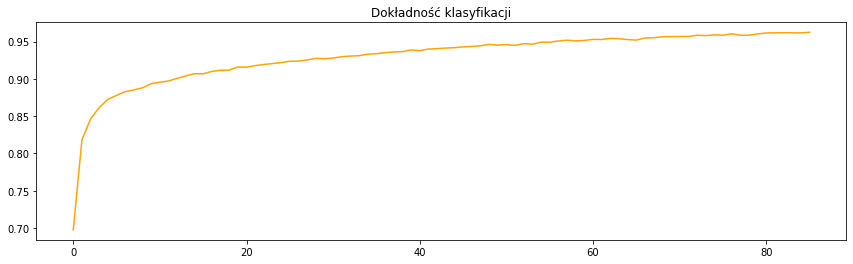

In [40]:
f1 = tf.keras.callbacks.EarlyStopping(monitor='loss', verbose=0, patience=5, mode="auto")
f2 = tf.keras.callbacks.ModelCheckpoint(filepath='modelv', save_weights_only = False, monitor = 'accuracy', mode='max', save_best_only = True)
f3 = tf.keras.callbacks.TensorBoard(log_dir='./logs')
history7 = model.fit(
    x=X_train,
    y=Y_train,
    batch_size=256,
    epochs=100,
    verbose="auto",
    callbacks= [f1,f2,f3],
    validation_split=0.1,
    )
trained_model = keras.models.load_model('modelv')
train_accuracy = trained_model.evaluate(X_train, Y_train)
test_accuracy = trained_model.evaluate(X_test, Y_test)
print(train_accuracy + test_accuracy)
print('Dokładności klasyfikacji na materiale treningowym  = ',train_accuracy)
print('dokładności klasyfikacji na materiale testowym  = ',test_accuracy)
summarize_diagnostics(history7)

To wszystko. Dziękuję! 